In [1]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


# General Function

In [3]:
import pickle

# Function to save a DataFrame
def save_dataframe(df, filename):
    """Save a DataFrame to a pickle file."""
    with open(filename, 'wb') as file:
        pickle.dump(df, file)
    print(f"DataFrame saved to {filename}")

# Function to load a DataFrame
def load_dataframe(filename):
    """Load a DataFrame from a pickle file."""
    with open(filename, 'rb') as file:
        df = pickle.load(file)
    print(f"DataFrame loaded from {filename}")
    return df

In [4]:
def missing_values(df):
    # Check and display the count of missing values per column
    missing_counts = df.isnull().sum()
    
    # Filter only columns that have missing values
    missing_counts = missing_counts[missing_counts > 0]
    
    # Display the missing values count
    print("Missing Values Count Per Column:")
    print(missing_counts)


def show_value_counts(df, col_name, top_n=10):
    if col_name not in df.columns:
        print(f"Column '{col_name}' not found in DataFrame.")
        return
    
    print(f"Value counts for column: {col_name}")
    print(df[col_name].value_counts().head(top_n))

def missing_stats(df):
    # Calculate missing values statistics
    print(pd.DataFrame({
        'Missing Count': df.isna().sum(),  # Count of NaN values per column
        'Total Rows': len(df),  # Total number of rows
        'Missing Percentage': (df.isna().sum() / len(df)) * 100  # Percentage of NaN per column
    }))


In [5]:

def convert_LabelEncoder(df, column_name):
    # Initialize the LabelEncoder
    le = LabelEncoder()
    # Fit and transform the column and update the DataFrame column
    df[column_name] = le.fit_transform(df[column_name])
    return df[column_name]



In [6]:
# Load CSV
df = pd.read_csv(r"C:\Users\oferg\Desktop\DS\ML-Project\dataframe.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

# Missing Data

In [9]:
missing_stats(df)

             Missing Count  Total Rows  Missing Percentage
League                   0       53949            0.000000
Season                   0       53949            0.000000
Stage                    0       53949            0.000000
Player                   0       53949            0.000000
Team                    11       53949            0.020390
GP                       0       53949            0.000000
MIN                      0       53949            0.000000
FGM                      0       53949            0.000000
FGA                      0       53949            0.000000
3PM                      0       53949            0.000000
3PA                      0       53949            0.000000
FTM                      0       53949            0.000000
FTA                      0       53949            0.000000
TOV                      0       53949            0.000000
PF                       0       53949            0.000000
ORB                      0       53949            0.0000

# Data Preparation

# Clean Text

In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Clean a string by lowercasing, removing punctuation/special characters, extra spaces, and stop words."""
    # Check if input is a string
    if not isinstance(text, str):
        return text

    original_text = text  # store the original for printing

    # Normalize text: lowercase
    text = text.lower()

    # Remove punctuation and special characters (keep letters, numbers, and whitespace)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stop words
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)

    # Print before and after cleaning if there's a change
    #if original_text != cleaned_text:
    #    print("Original:", original_text, "=> Cleaned:", cleaned_text)
    
    return cleaned_text

def clean_text_column(df, column_name):
    """
    Cleans the text in the specified column of a DataFrame.
    
    For each row in the column, prints the original and cleaned text,
    then updates the DataFrame with the cleaned text.
    """
    df[column_name] = df[column_name].apply(clean_text)
    return df

string_columns = df.select_dtypes(include=['object','string']).columns.tolist()
#print(string_columns)
for column_name in string_columns: 
    # Clean the 'text' column
    df = clean_text_column(df,column_name )



# Transform/Manipulate data

In [14]:
# Convert 'birth_date' to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Calculate the median date (ignoring NaN values)
median_birth_date = df['birth_date'].median()

# Fill NaN values in 'birth_date' with the median date
df['birth_date'] = df['birth_date'].fillna(median_birth_date)


# Extract the year from 'birth_date' and fill missing values in 'birth_year'
df['birth_year'] = df['birth_year'].fillna(df['birth_date'].dt.year)

# Mapping for month names to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Reverse mapping for numbers back to month names
reverse_month_map = {v: k for k, v in month_map.items()}

# Step 1: Convert month names to numbers
df['birth_month'] = df['birth_month'].map(month_map).fillna(df['birth_month'])

# Step 2: Convert birth_month to numeric (handling any remaining strings)
df['birth_month'] = pd.to_numeric(df['birth_month'], errors='coerce')

# Step 3: Fill missing values using the month extracted from 'birth_date'
df['birth_month'] = df['birth_month'].fillna(df['birth_date'].dt.month)

df.drop('birth_date', axis=1, inplace=True)


In [15]:
df = df.drop(['height', 'weight'], axis=1)

def get_position(row):
    height = row['height_cm']
    weight = row['weight_kg']
    
    # Try to assign using both height and weight based on the table:
    # Note: Weight ranges in kg approximate the lbs ranges given.
    # Center: Height >= 208 cm and Weight >= 109 kg
    if height >= 208 and weight >= 109:
        return 'Center'
    # Power Forward (PF): Height 203-211 cm and Weight 100-118 kg
    elif 203 <= height <= 211 and 100 <= weight <= 118:
        return 'PF'
    # Small Forward (SF): Height 198-206 cm and Weight 95-104 kg
    elif 198 <= height <= 206 and 95 <= weight <= 104:
        return 'SF'
    # Shooting Guard (SG): Height 191-198 cm and Weight 86-95 kg
    elif 191 <= height <= 198 and 86 <= weight <= 95:
        return 'SG'
    # Point Guard (PG): Height 178-191 cm and Weight 75-86 kg
    elif 178 <= height <= 191 and 75 <= weight <= 86:
        return 'PG'
    else:
        # Fallback using height only:
        if height >= 208:
            return 'Center'
        elif height >= 203:
            return 'PF'
        elif height >= 198:
            return 'SF'
        elif height >= 191:
            return 'SG'
        elif height >= 178:
            return 'PG'
        else:
            return 'Unknown'

# Example usage on your DataFrame:
df['Position'] = df.apply(get_position, axis=1)

# Display the first few rows to verify the results
#print(df[['height_cm', 'weight_kg', 'Position']].head())


In [16]:
# Convert Columns Player,Team,draft_team,high_school into string
df = df.astype({col: 'string' for col in ['Player','Team','draft_team','high_school']})

In [17]:

#Overall Position=(Round−1)×30+Pick in Round
mask = df['draft_round'].notna() & df['draft_pick'].notna()
df.loc[mask, 'draft_position'] = (df.loc[mask, 'draft_round'] - 1) * 30 + df.loc[mask, 'draft_pick']
df['draft_position'] = df['draft_position'].fillna(0)

#drop columns with "duplicate" data
df = df.drop(['REB', 'PTS','draft_pick','draft_round'], axis=1)
#REB=ORB+DRB
#PTS=FGM+3PM+FTM
#height=height_cm
#weight=weight_kg

df['NBA'] = (df['League'] == 'nba').astype(int)
#df['NBA'].value_counts()

# Reduce Large Categories:

In [19]:
# Option using .loc with a case-insensitive comparison:
df.loc[df['League'].str.lower() != 'nba', 'League'] = 'Other'
df.loc[df['nationality'].str.lower() != 'united states', 'nationality'] = 'Other'

In [20]:
save_dataframe(df, 'DATA-PREP')
#df=load_dataframe('DATA-PREP')

DataFrame saved to DATA-PREP


# Exploratory Data Analysis (EDA)

In [22]:
df.shape

(53949, 30)

In [23]:
df.describe()

GP           MIN           FGM           FGA           3PM  \
count  53949.000000  53949.000000  53949.000000  53949.000000  53949.000000   
mean      30.313574    752.431404    113.200541    245.094942     28.468535   
std       17.849616    534.216679    100.164033    212.155076     30.673395   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000    380.900000     48.000000    109.000000      6.000000   
50%       29.000000    663.000000     89.000000    196.000000     20.000000   
75%       37.000000    954.000000    145.000000    310.000000     41.000000   
max       85.000000   3485.000000    978.000000   2173.000000    402.000000   

                3PA           FTM           FTA           TOV           PF  \
count  53949.000000  53949.000000  53949.000000  53949.000000  53949.00000   
mean      80.738383     56.297299     76.012716     47.260487     70.10104   
std       80.672208     59.240650     76.172698     37.398461     45.62977   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%       20.000000     20.000000     28.000000     21.000000     37.00000   
50%       61.000000     40.000000     56.000000     39.000000     64.00000   
75%      117.000000     73.000000     99.000000     63.000000     91.00000   
max     1028.000000    756.000000    972.000000    464.000000    371.00000   

       ...           DRB           AST           STL           BLK  \
count  ...  53949.000000  53949.000000  53949.000000  53949.000000   
mean   ...     90.601216     62.786910     26.715398     10.492057   
std    ...     84.629100     73.184287     22.077459     18.199867   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     37.000000     20.000000     11.000000      1.000000   
50%    ...     68.000000     41.000000     21.000000      4.000000   
75%    ...    114.000000     78.000000     36.000000     12.000000   
max    ...    894.000000    925.000000    225.000000    307.000000   

         birth_year   birth_month     height_cm     weight_kg  draft_position  \
count  53949.000000  53949.000000  53875.000000  49385.000000    53949.000000   
mean    1986.365438      6.214944    197.445123     95.422193        4.824612   
std        6.617613      3.384472      8.728587     11.851299       12.742264   
min     1961.000000      1.000000    160.000000     59.000000        0.000000   
25%     1982.000000      3.000000    191.000000     86.000000        0.000000   
50%     1987.000000      6.000000    198.000000     95.000000        0.000000   
75%     1991.000000      9.000000    203.000000    104.000000        0.000000   
max     2004.000000     12.000000    229.000000    170.000000      201.000000   

                NBA  
count  53949.000000  
mean       0.141485  
std        0.348525  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 21 columns]

# Data Protocol

In [25]:
# Type of values
df.dtypes.to_excel("df_datatype.xlsx", sheet_name='data_type')

# Maximum values (only numeric columns)
df.select_dtypes(include=['number']).max().to_excel("max_df.xlsx", sheet_name='max')

# Minimum values (only numeric columns)
df.select_dtypes(include=['number']).min().to_excel("min_df.xlsx", sheet_name='min')

# Missing values
df.isnull().sum(axis=0).to_excel("NA_df.xlsx", sheet_name='NA')

# Unique values count
df.nunique().to_excel("unique_df.xlsx", sheet_name='unique')

print("Excel files exported successfully.")

Excel files exported successfully.


# Descriptive Statistics

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (53949, 30)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Player of type=string is not classified
Team of type=string is not classified
high_school of type=string is not classified
draft_team of type=string is not classified
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  14
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number

Number of All Scatter Plots = 21


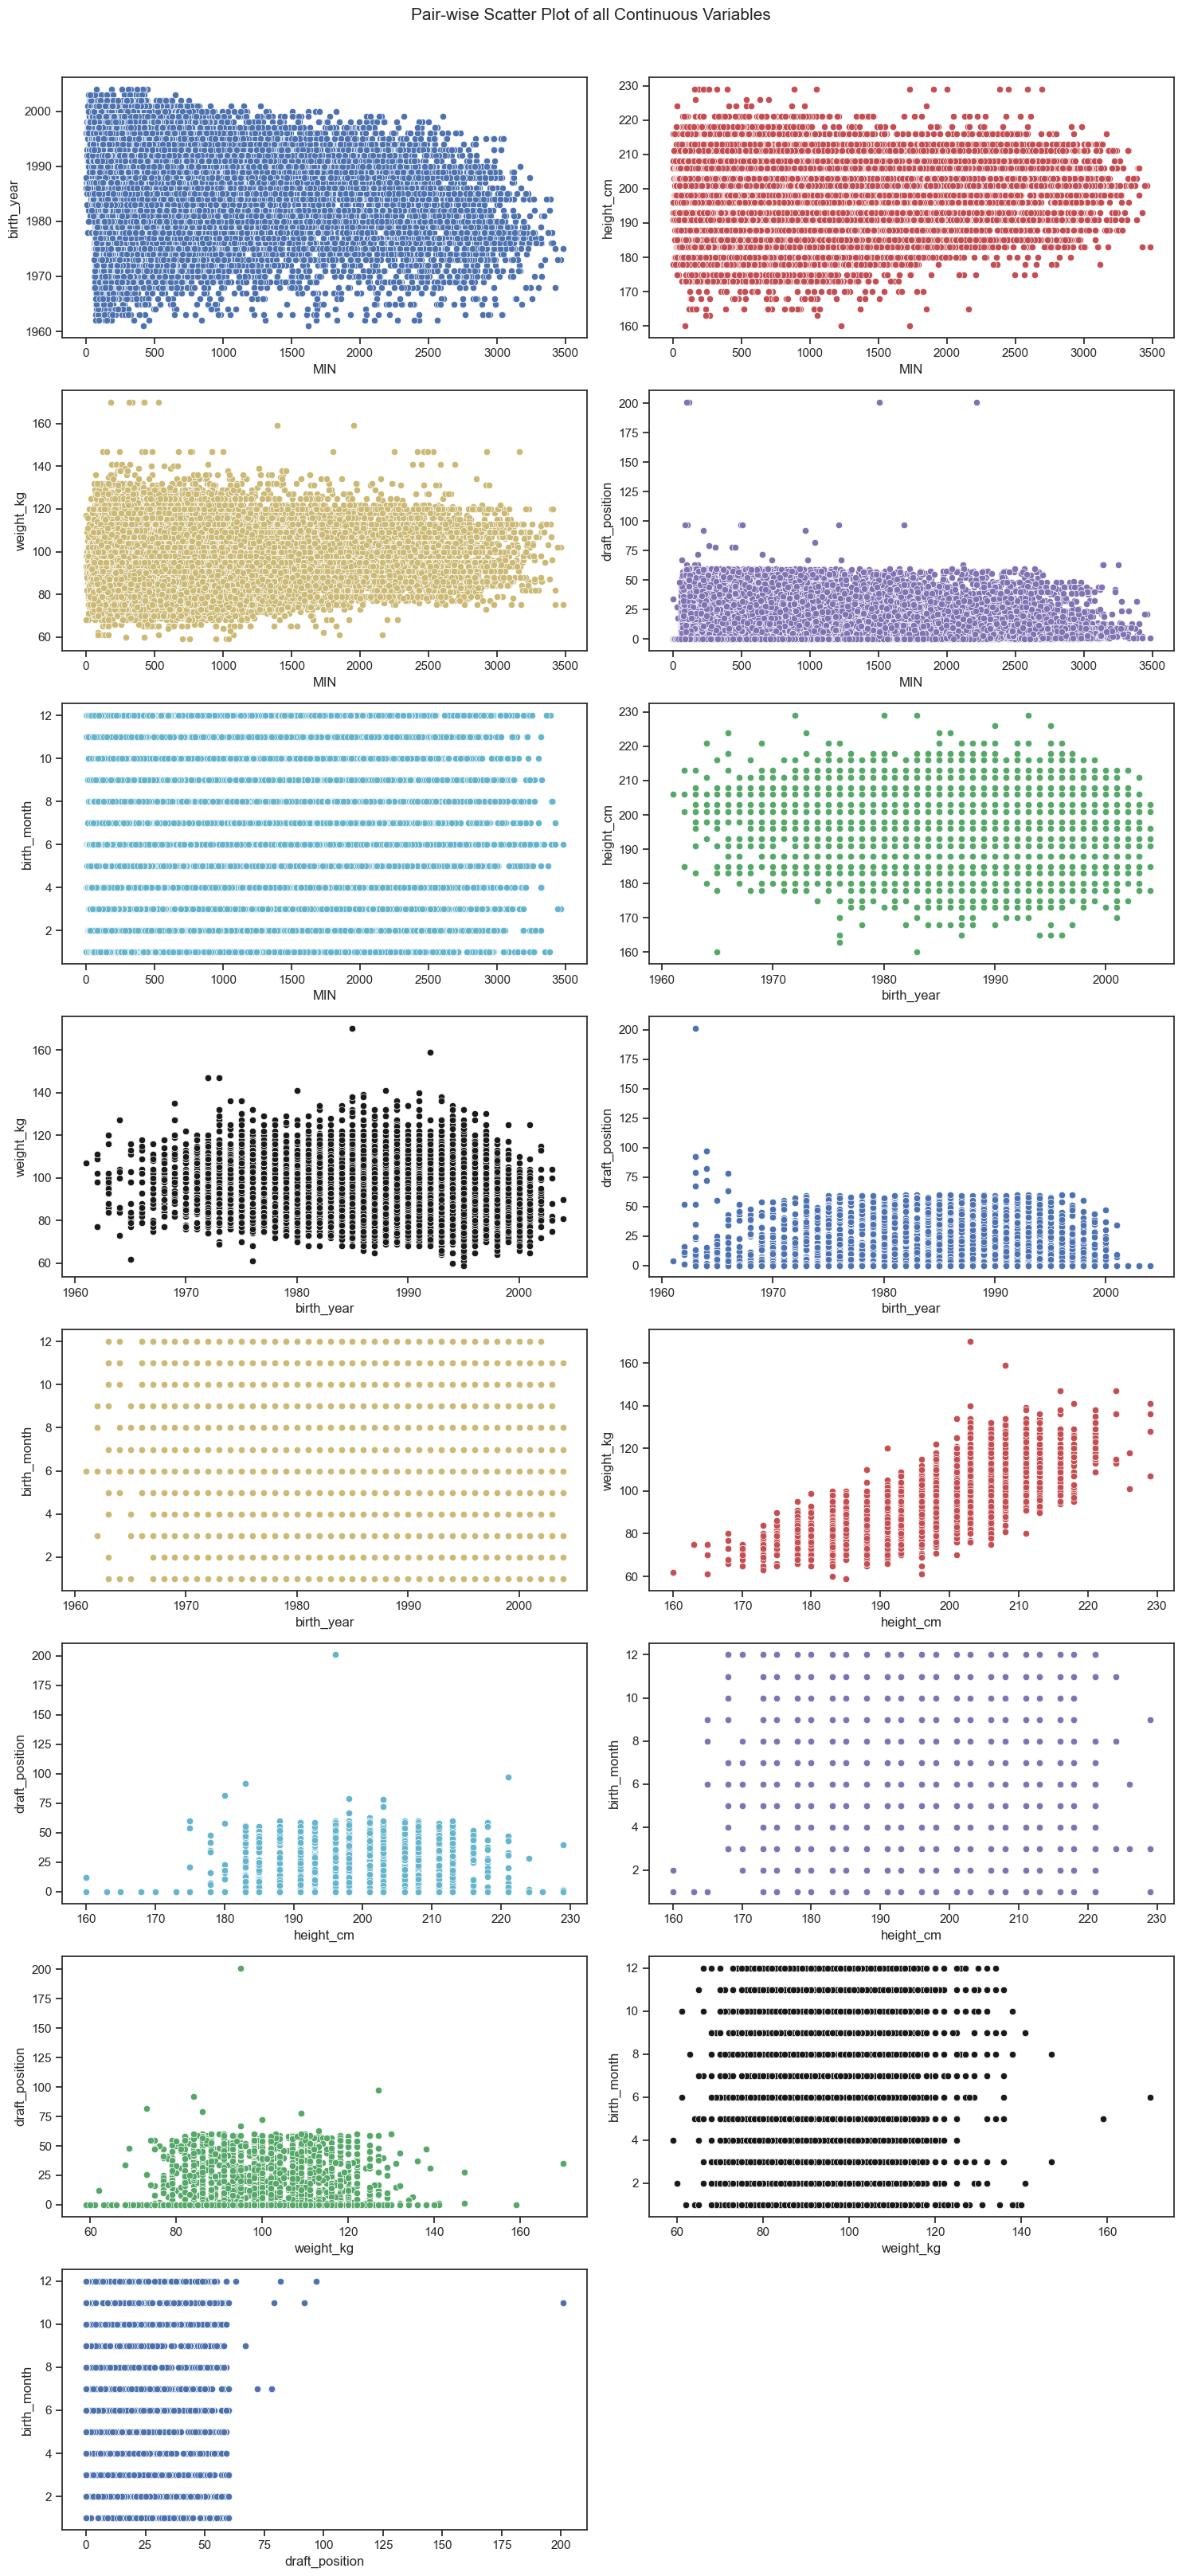

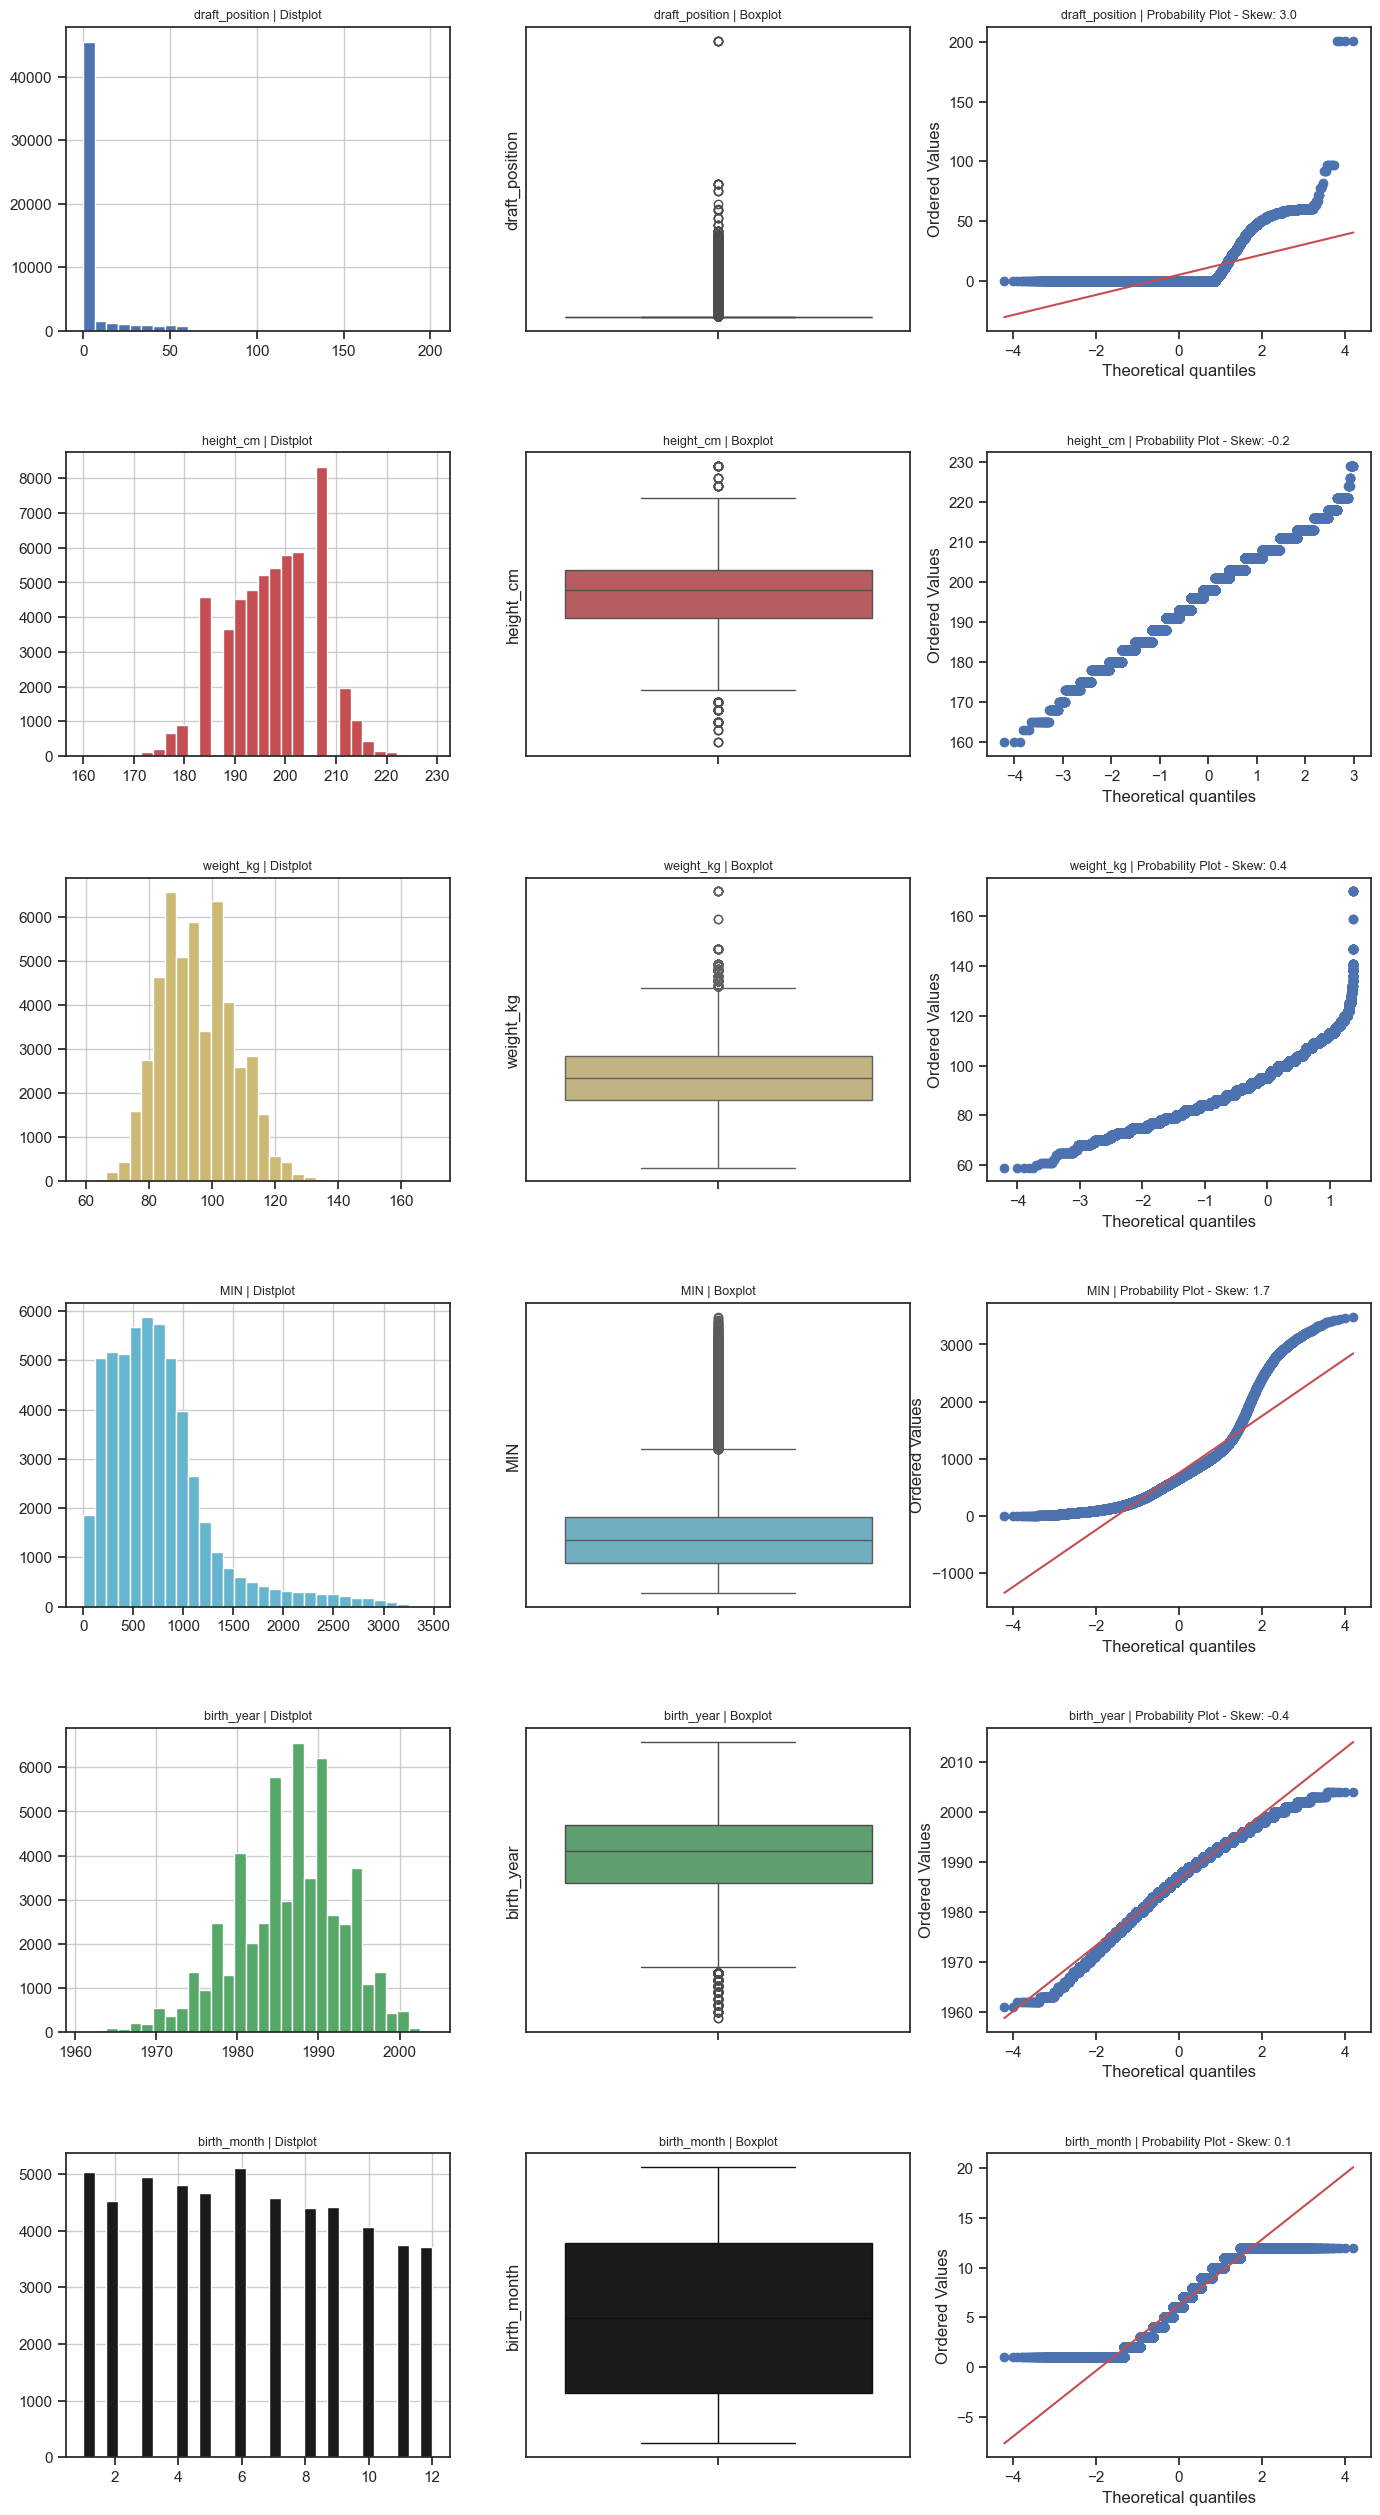

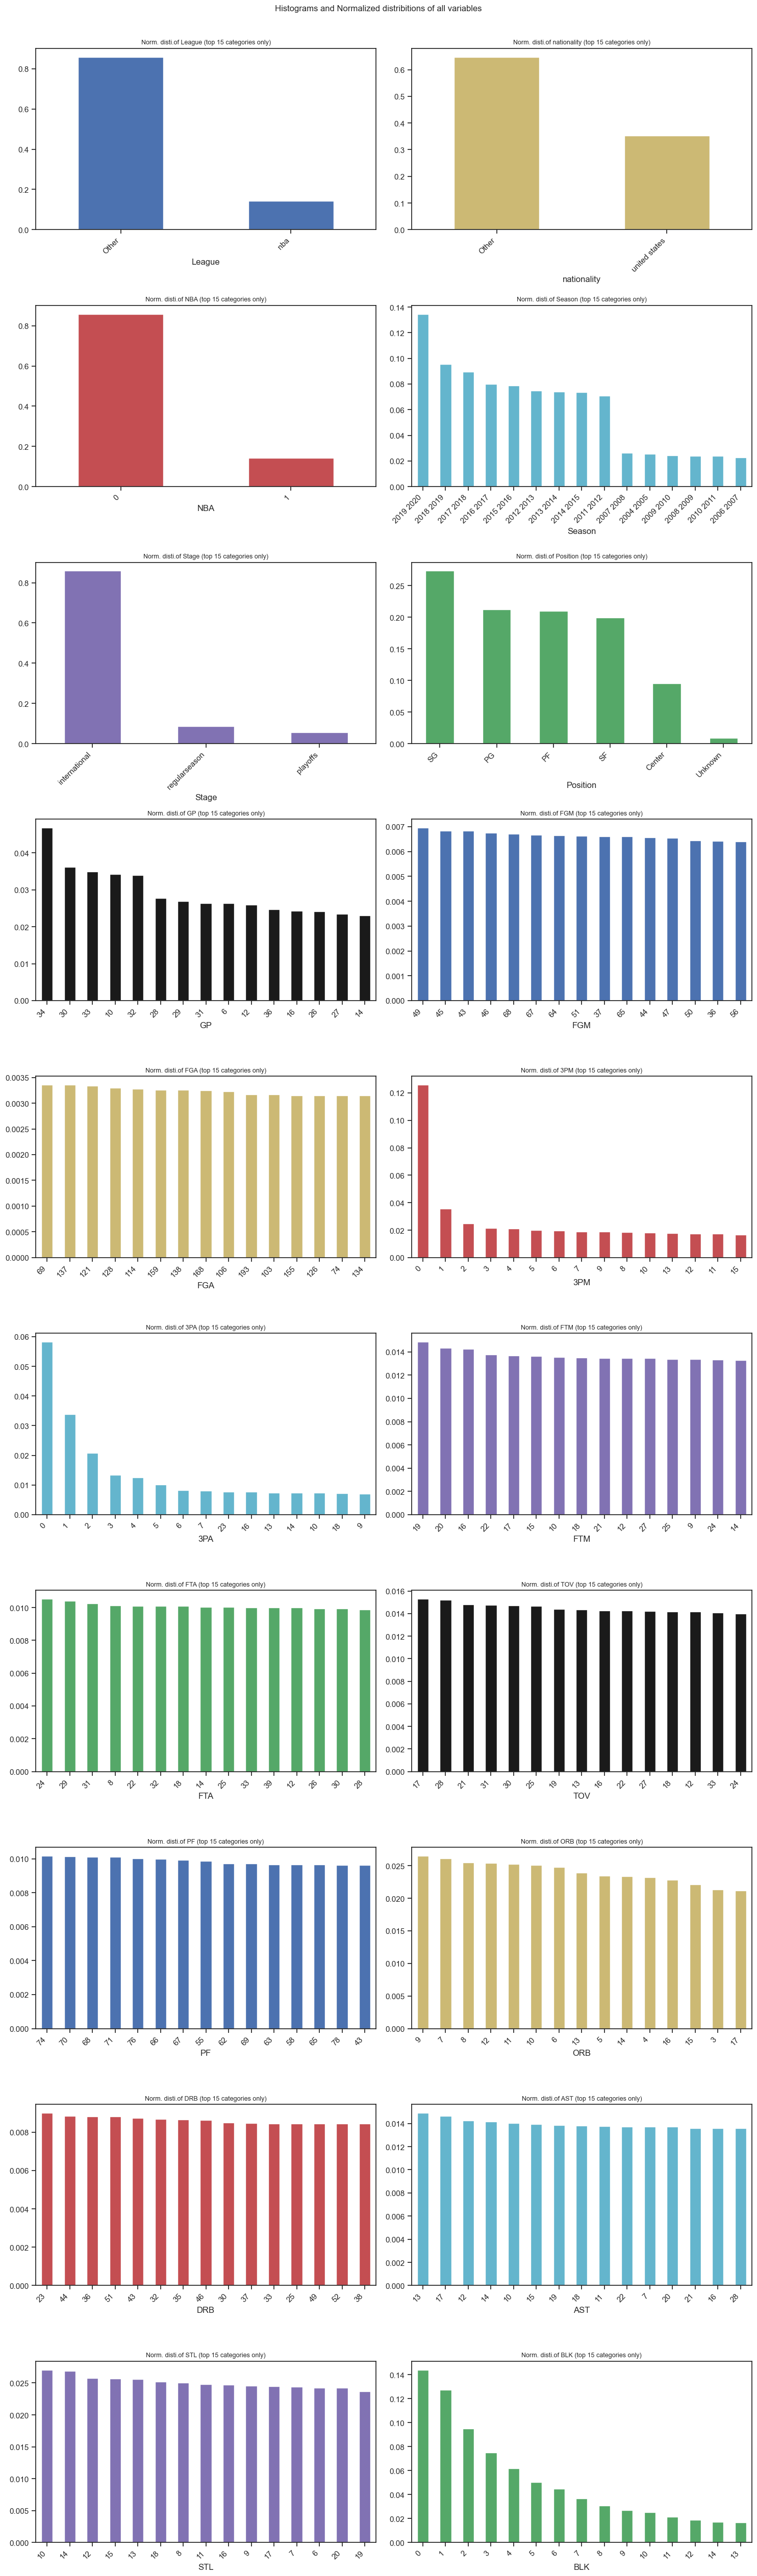

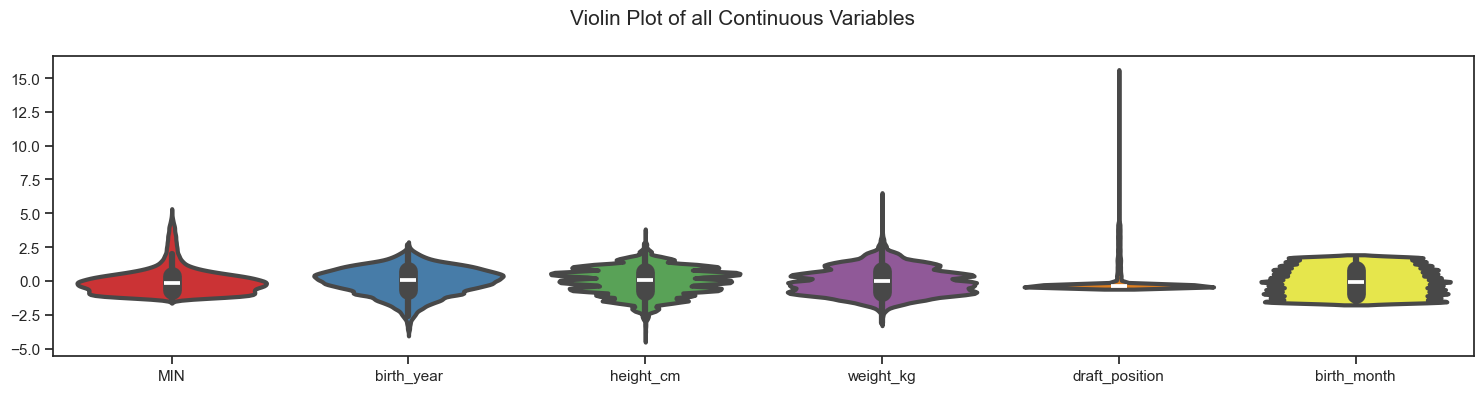

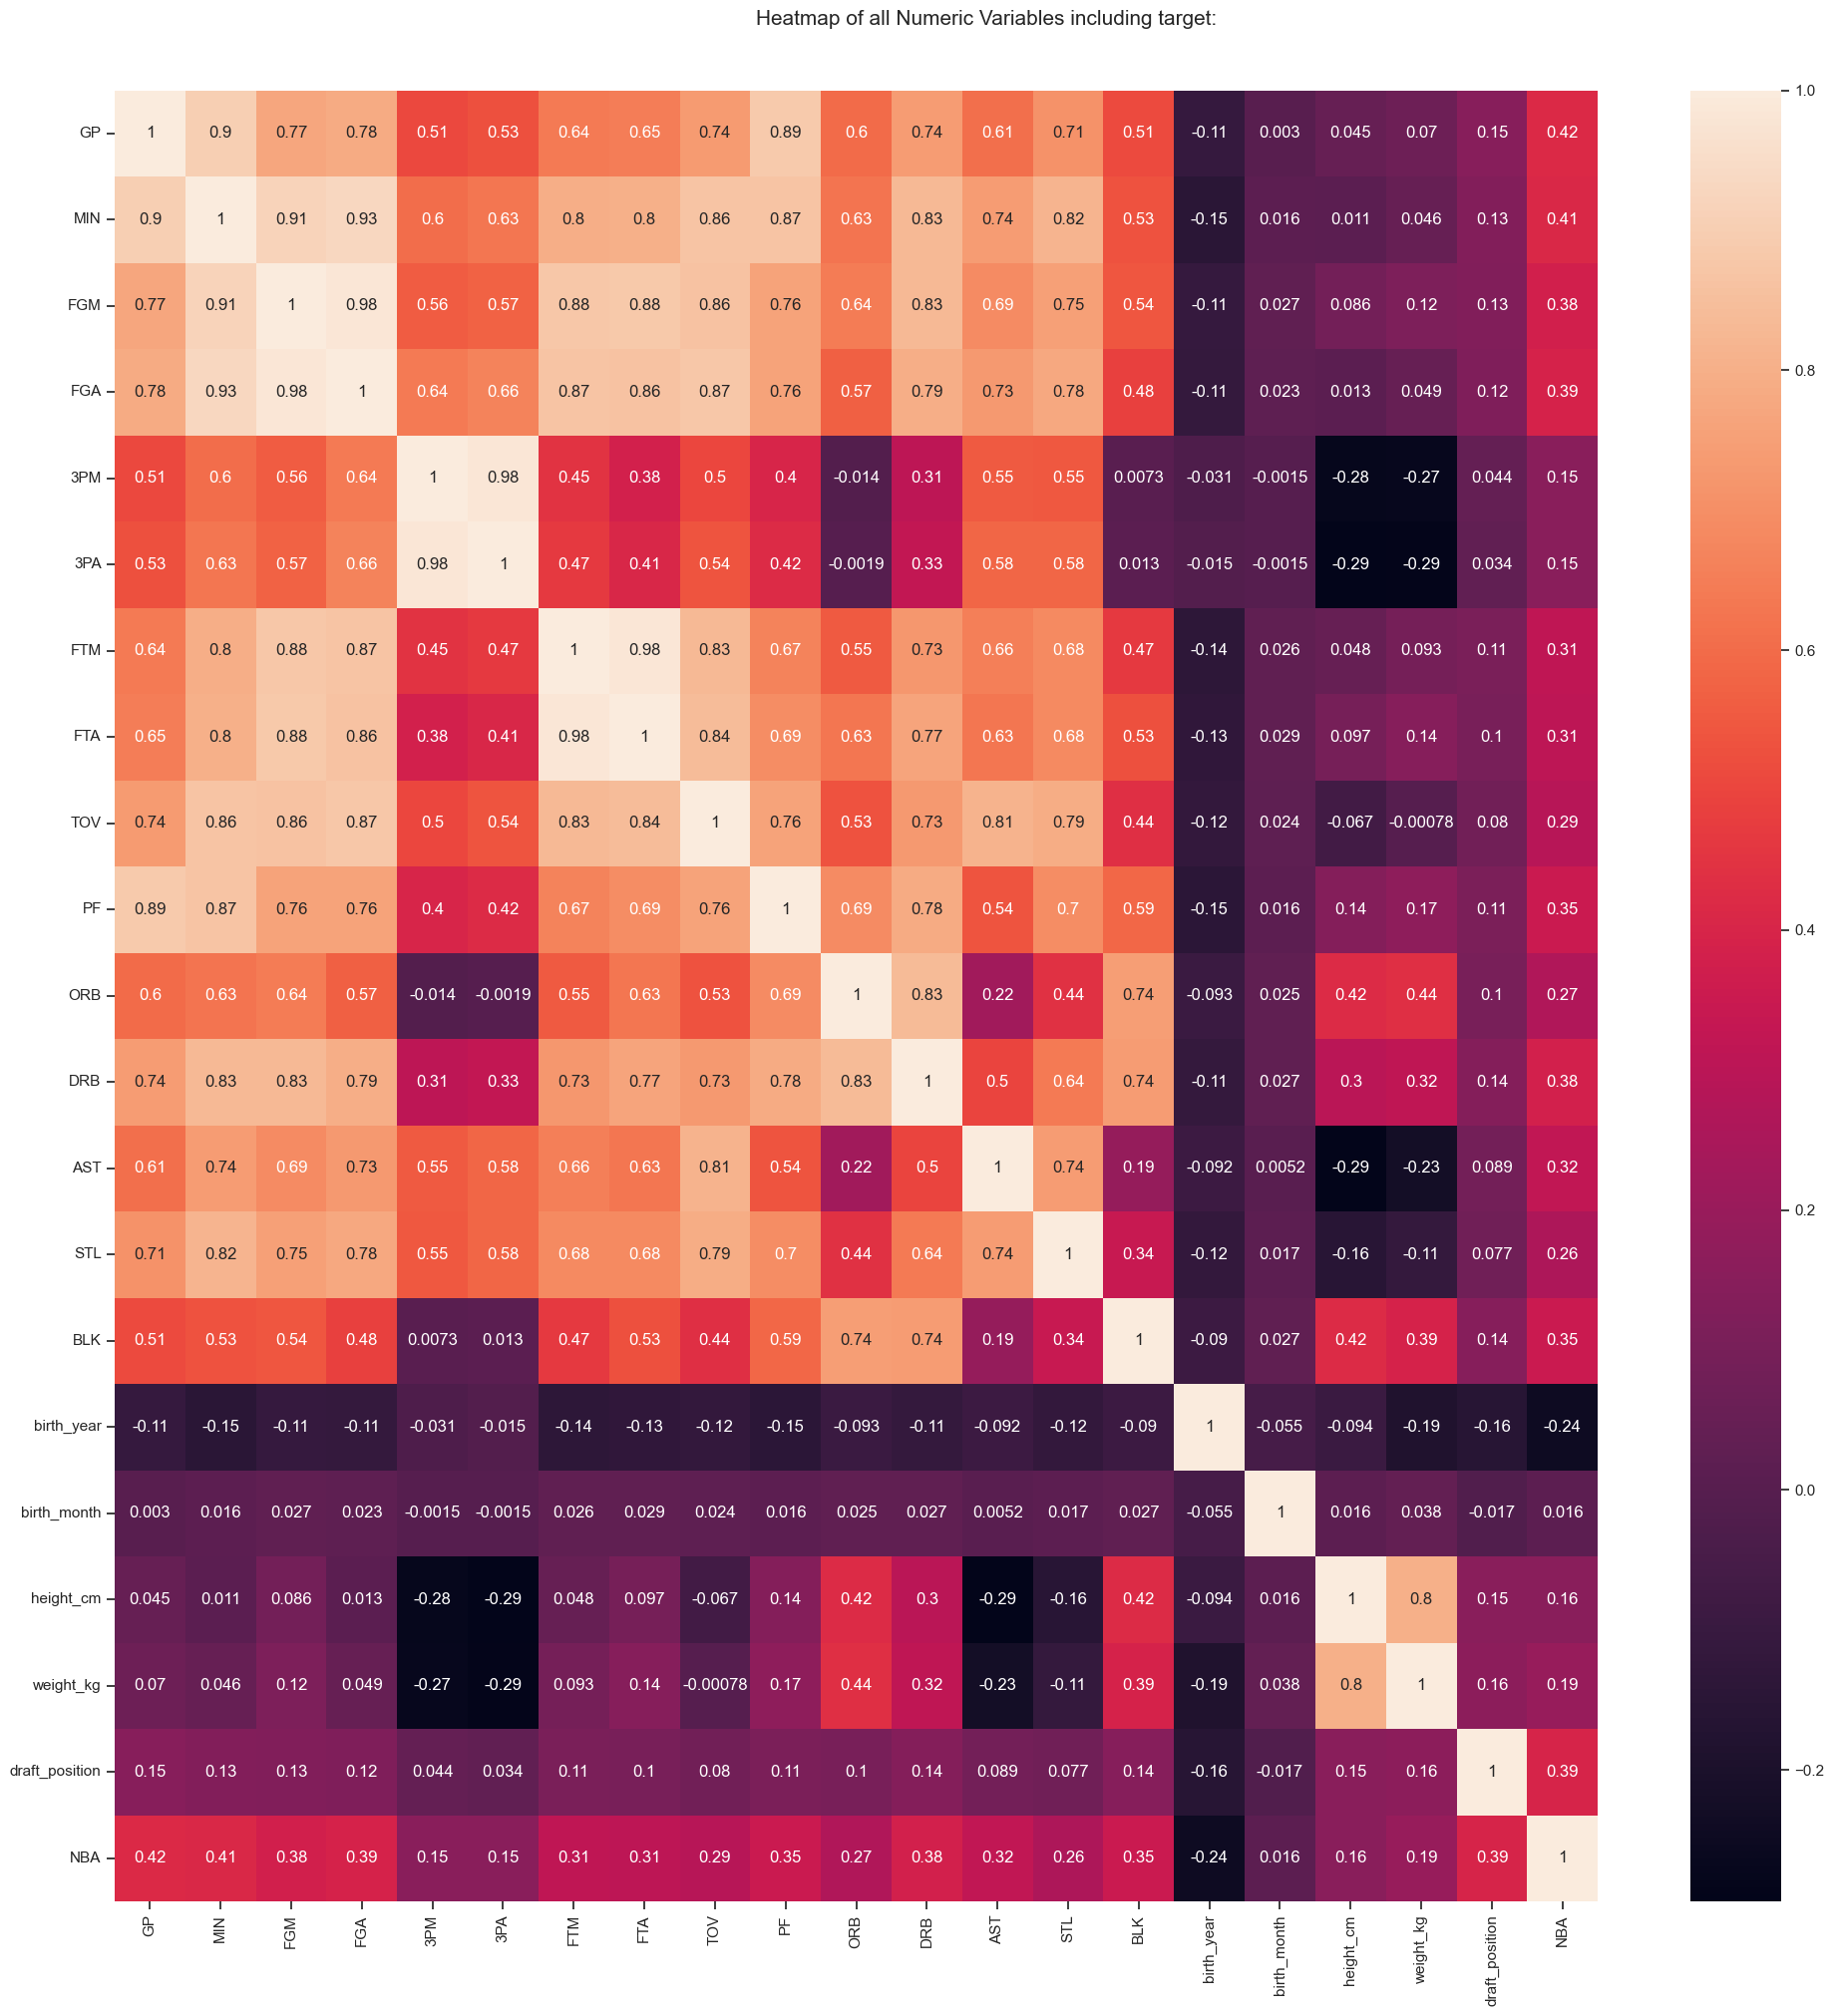

All Plots done
Time to run AutoViz = 83 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


League   Season       Stage             Player         Team  GP    MIN   \
0        nba  1999 2000  regularseason      shaquille oneal   lal  79  3163.0   
1        nba  1999 2000  regularseason         vince carter   tor  82  3126.0   
2        nba  1999 2000  regularseason          karl malone   uta  82  2947.0   
3        nba  1999 2000  regularseason        allen iverson   phi  70  2853.0   
4        nba  1999 2000  regularseason          gary payton   sea  82  3425.0   
...      ...        ...            ...                  ...   ...  ..     ...   
53944  Other  2019 2020  international  kyrylo meshheryakov   myk  15   127.0   
53945  Other  2019 2020  international    yaroslav kadygrob   ode  10    81.7   
53946  Other  2019 2020  international      ernesto tkachuk   ode  16   124.7   
53947  Other  2019 2020  international    andrij shapovalov  khar  12    59.2   
53948  Other  2019 2020  international    dmitriy lypovtsev  khar   5    86.3   

       FGM   FGA  3PM  3PA  FTM  FTA  TOV  PF   ORB  DRB  AST  STL  BLK  \
0      956  1665    0    1  432  824  223  255  336  742  299   36  239   
1      788  1696   95  236  436  551  178  263  150  326  322  110   92   
2      752  1476    2    8  589  739  231  229  169  610  304   79   71   
3      729  1733   89  261  442  620  230  162   71  196  328  144    5   
4      747  1666  177  520  311  423  224  178  100  429  732  153   18   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
53944    7    28    2   13    3    4    5   27    4   14    8    1    3   
53945    5    16    4   14    1    3    3    2    2    4    3    0    0   
53946    1    15    0   11    7   14   11   12    0   15   10    6    1   
53947    0     8    0    7    3    6    5    6    1    4    3    1    0   
53948    1    13    0    9    0    0    7   11    2   12    4    2    1   

       birth_year  birth_month  height_cm  weight_kg  nationality    \
0        1972.0        3.0        216.0      147.0    united states   
1        1977.0        1.0        198.0      100.0    united states   
2        1963.0        7.0        206.0      120.0    united states   
3        1975.0        6.0        183.0       75.0    united states   
4        1968.0        7.0        193.0       82.0    united states   
...           ...          ...        ...        ...            ...   
53944    1995.0        8.0        198.0       83.0            Other   
53945    1991.0       10.0        191.0       85.0            Other   
53946    1994.0        9.0        188.0       91.0            Other   
53947    1993.0       11.0        188.0       78.0            Other   
53948    1986.0       10.0        203.0      100.0            Other   

             high_school               draft_team       Position  \
0      robert g cole high school          orlando magic  Center    
1           mainland high school  golden state warriors      SF    
2        summerfield high school              utah jazz      PF    
3             bethel high school    philadelphia sixers      PG    
4            skyline high school    seattle supersonics      SG    
...                          ...                    ...      ...   
53944                       <NA>                   <NA>      SF    
53945                       <NA>                   <NA>      PG    
53946                       <NA>                   <NA>      PG    
53947                       <NA>                   <NA>      PG    
53948                       <NA>                   <NA>      PF    

       draft_position  NBA  
0            1.0        1   
1            5.0        1   
2           13.0        1   
3            1.0        1   
4            2.0        1   
...               ...  ...  
53944        0.0        0   
53945        0.0        0   
53946        0.0        0   
53947        0.0        0   
53948        0.0        0   

[53949 rows x 30 columns]

In [27]:
# Install AutoViz if not installed
# !pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
import pandas as pd
%matplotlib inline

# Initialize AutoViz
AV = AutoViz_Class()


# Apply AutoViz
AV.AutoViz(filename="", dfte=df)

# Target Value

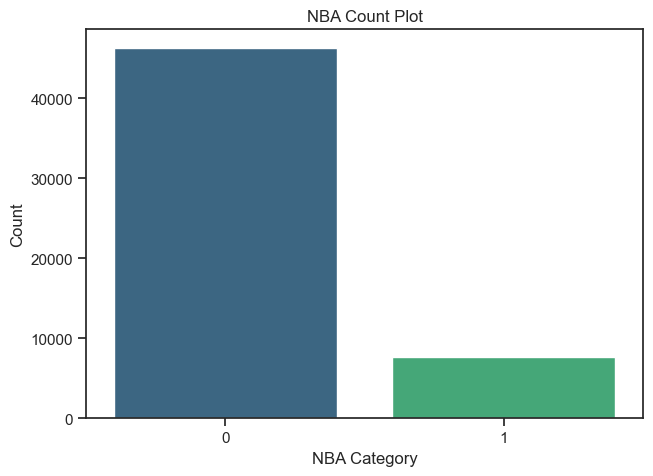

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.countplot(x='NBA', data=df,palette='viridis')
plt.title("NBA Count Plot")
plt.xlabel("NBA Category")
plt.ylabel("Count")
plt.show()

# Categorial Data

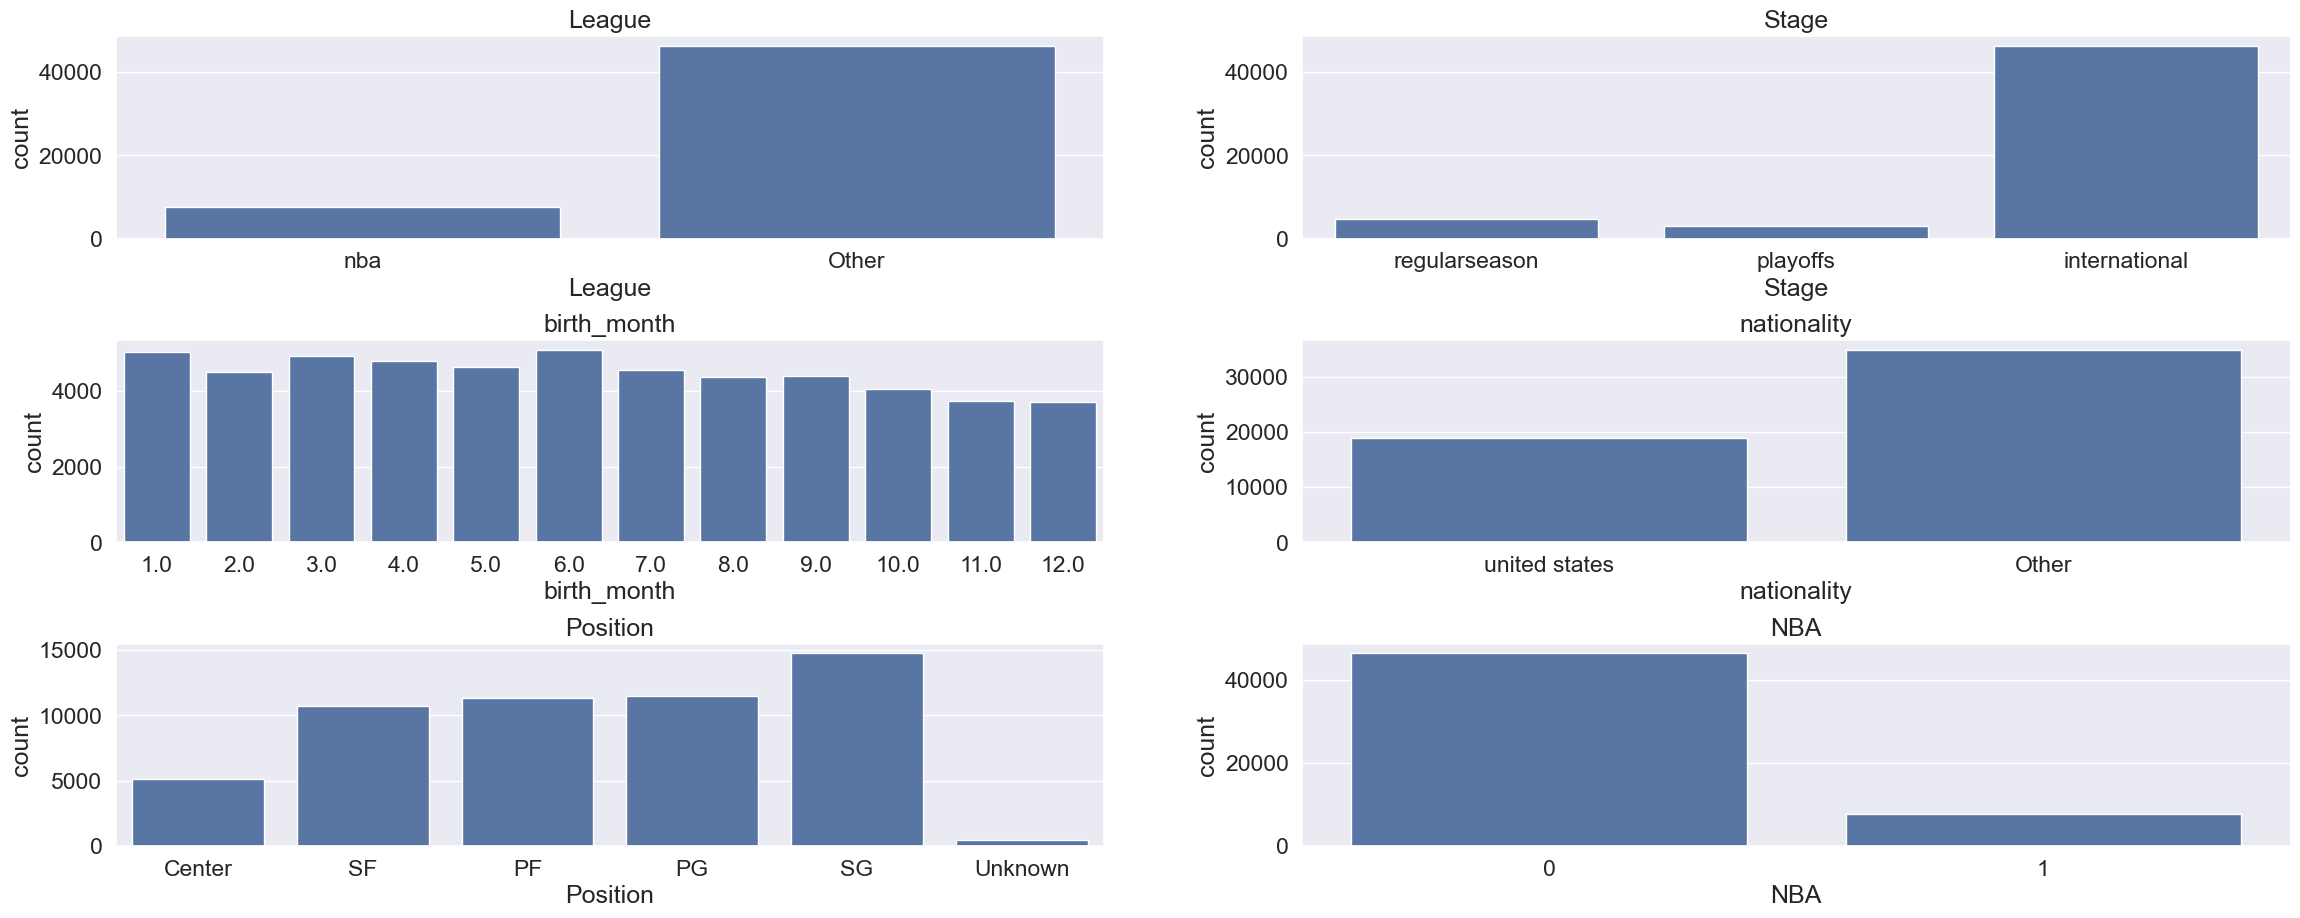

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb

# Get the count of unique values for each column
unique_counts = df.nunique()

# Filter columns where the unique value count is less than 20
categorical_cols = unique_counts[unique_counts < 20].index.tolist()

# Number of subplots (adjust as needed)
rows = (len(categorical_cols) // 2) + (len(categorical_cols) % 2)
cols = 2  # 2 columns in subplot

fig = plt.figure(figsize=(25, 10))
plt.subplots_adjust(hspace=0.5)
sb.set(font_scale=1.5)

# Plot each categorical column
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, idx)
    plt.title(col)
    plt.xlabel(col)
    sb.countplot(x=df[col])  # Fix: Use 'x=df[col]' instead of 'categorical_df[i]'

plt.show()


# Histograms for continues numbers 

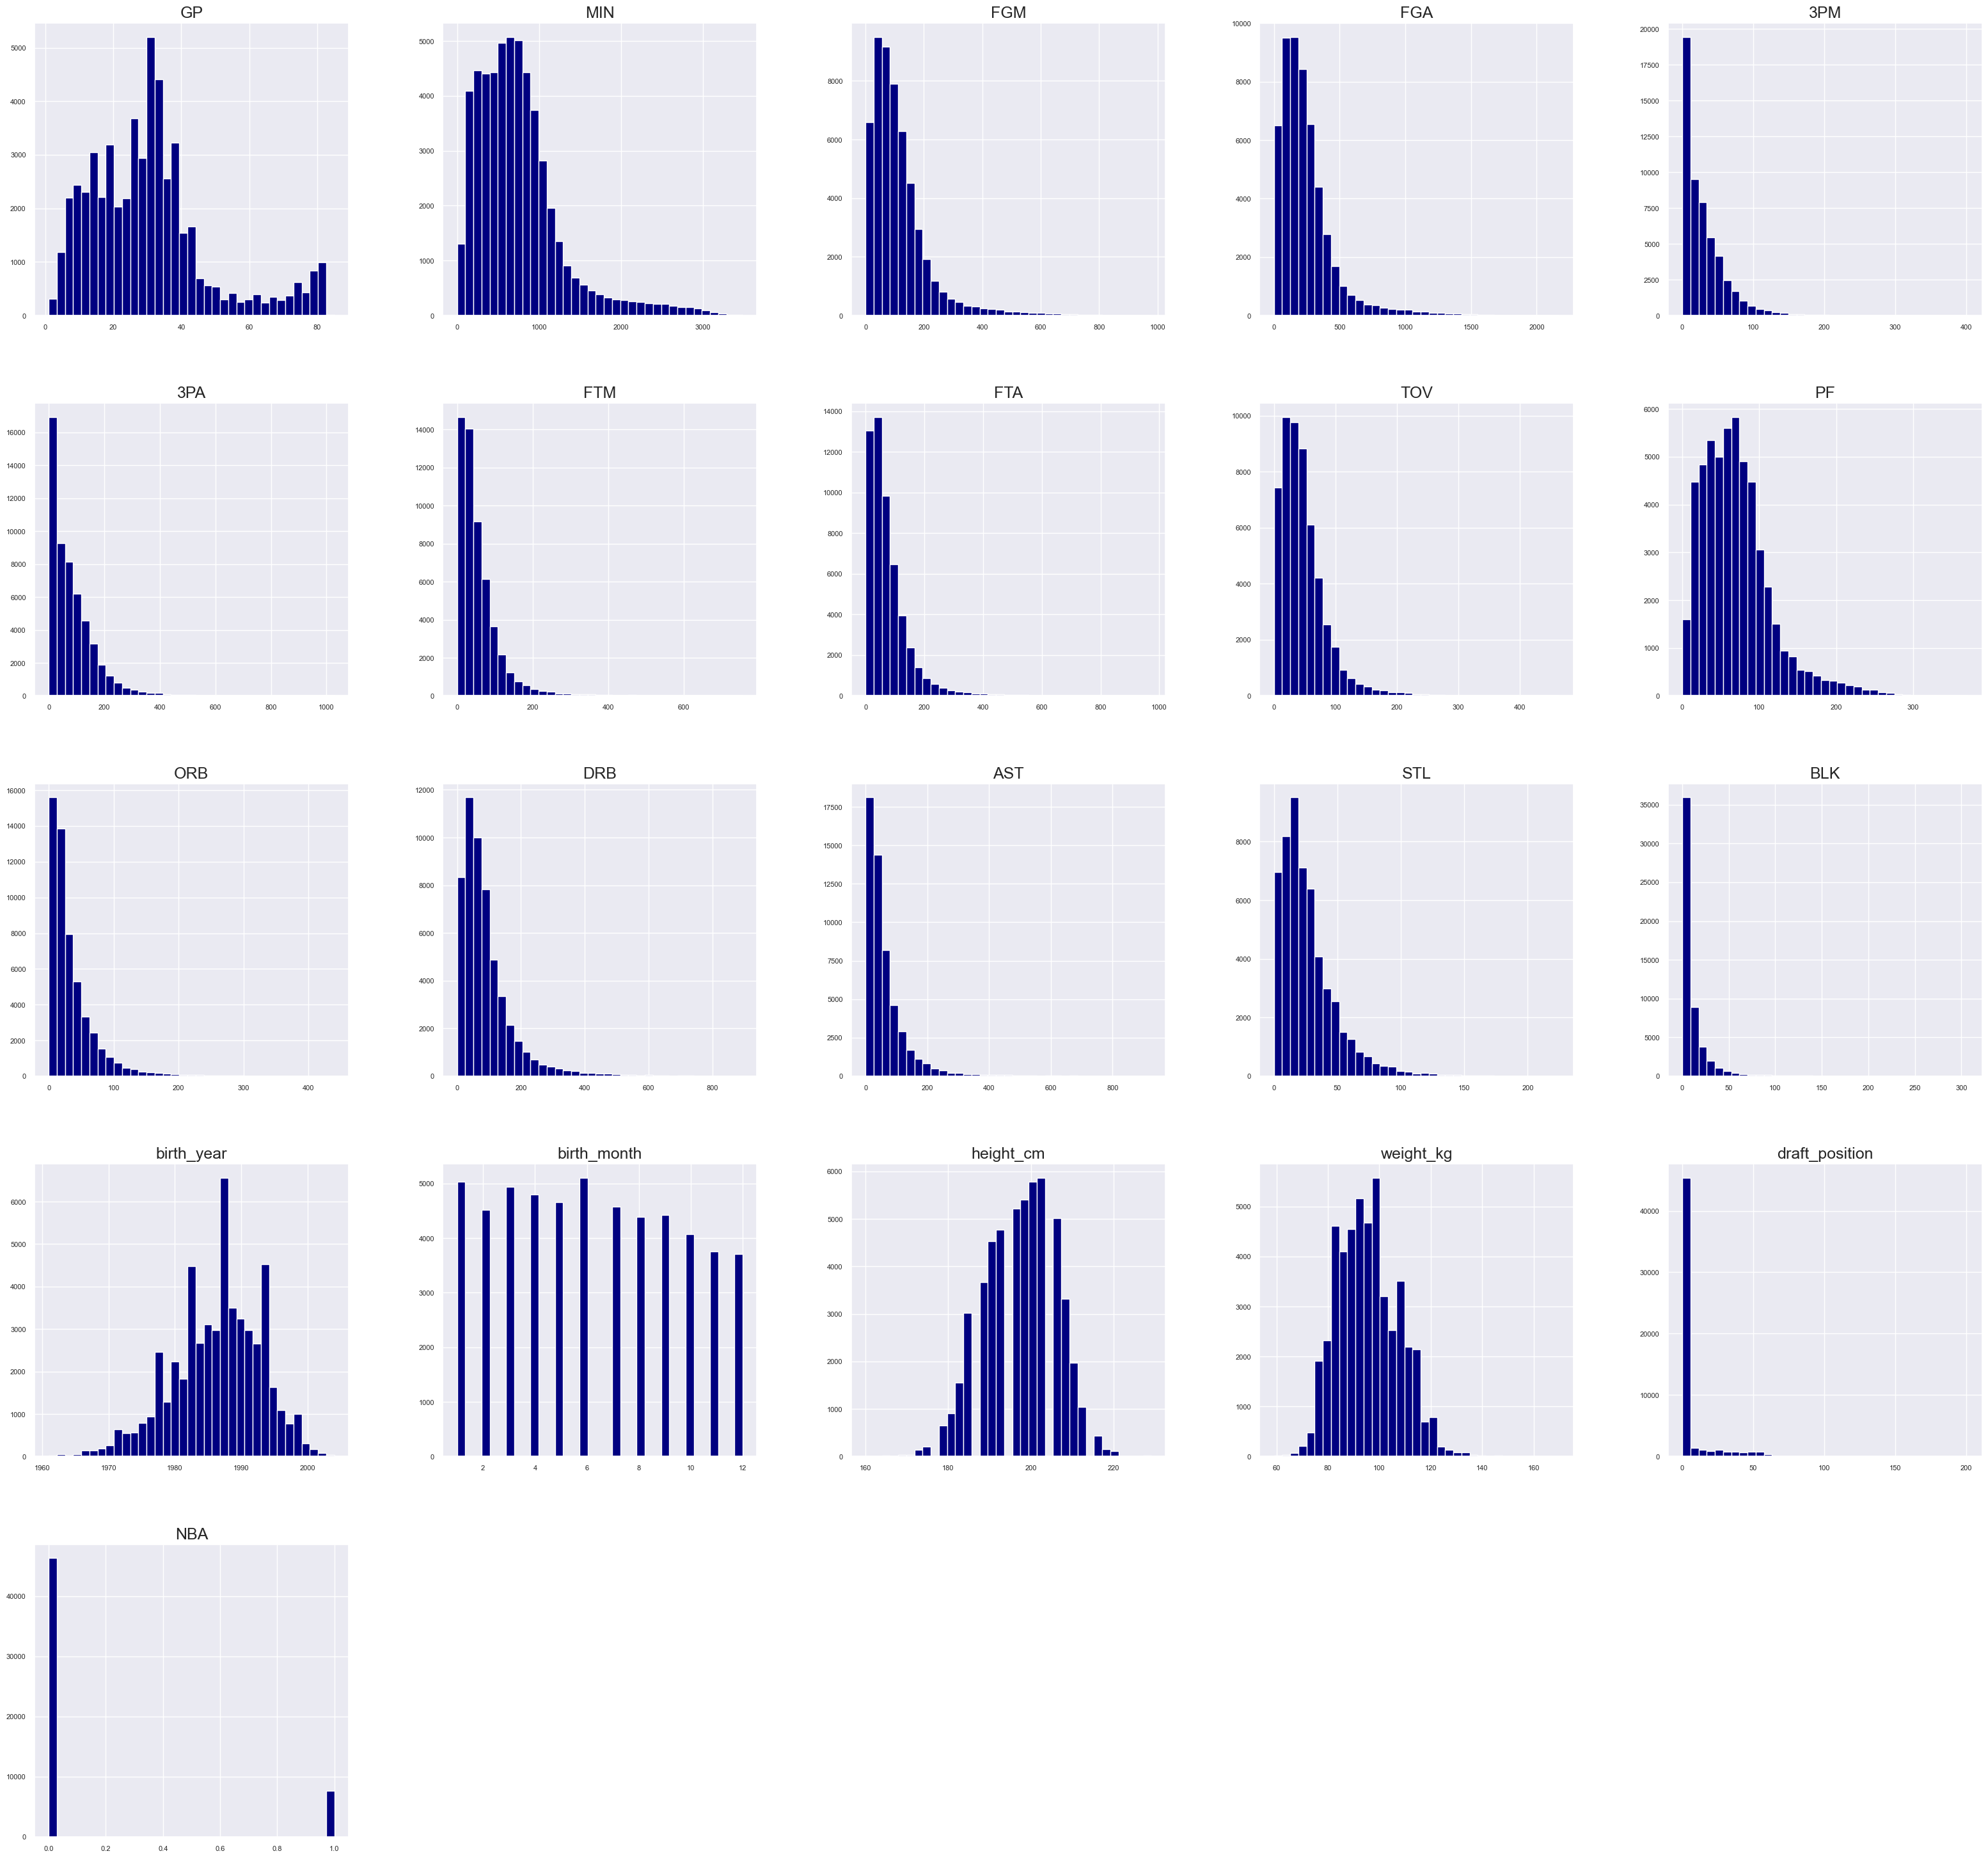

In [33]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df[numeric_cols].hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");
plt.show()            

# Skewness

In [35]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df[numeric_cols].skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

# Correlation

In [37]:
df[numeric_cols].corr()

GP        MIN       FGM       FGA       3PM       3PA    \
GP              1.000000  0.903582  0.768714  0.784491  0.505563  0.527220   
MIN             0.903582  1.000000  0.914402  0.930406  0.604479  0.627555   
FGM             0.768714  0.914402  1.000000  0.983295  0.559152  0.572846   
FGA             0.784491  0.930406  0.983295  1.000000  0.637758  0.663748   
3PM             0.505563  0.604479  0.559152  0.637758  1.000000  0.983646   
3PA             0.527220  0.627555  0.572846  0.663748  0.983646  1.000000   
FTM             0.637377  0.795691  0.876864  0.867696  0.446003  0.466523   
FTA             0.649512  0.799697  0.879849  0.859477  0.382445  0.406940   
TOV             0.735717  0.864981  0.861358  0.874529  0.501088  0.536565   
PF              0.885048  0.868142  0.762183  0.758918  0.399633  0.420647   
ORB             0.597817  0.625374  0.642996  0.568996 -0.014104 -0.001893   
DRB             0.742193  0.829944  0.831455  0.793637  0.307867  0.325771   
AST             0.610477  0.740519  0.688263  0.730239  0.552343  0.581394   
STL             0.708618  0.817706  0.751161  0.776269  0.549369  0.584939   
BLK             0.509879  0.532894  0.544147  0.484749  0.007296  0.013291   
birth_year     -0.108633 -0.150206 -0.109935 -0.112033 -0.030885 -0.015311   
birth_month     0.002986  0.016032  0.026871  0.022600 -0.001461 -0.001478   
height_cm       0.045348  0.010942  0.086334  0.013114 -0.276065 -0.292628   
weight_kg       0.070039  0.046105  0.120466  0.049473 -0.272437 -0.287027   
draft_position  0.148221  0.132636  0.127728  0.124235  0.044306  0.034464   
NBA             0.417531  0.412831  0.375115  0.392198  0.154920  0.153765   

                   FTM       FTA       TOV       PF        ORB       DRB    \
GP              0.637377  0.649512  0.735717  0.885048  0.597817  0.742193   
MIN             0.795691  0.799697  0.864981  0.868142  0.625374  0.829944   
FGM             0.876864  0.879849  0.861358  0.762183  0.642996  0.831455   
FGA             0.867696  0.859477  0.874529  0.758918  0.568996  0.793637   
3PM             0.446003  0.382445  0.501088  0.399633 -0.014104  0.307867   
3PA             0.466523  0.406940  0.536565  0.420647 -0.001893  0.325771   
FTM             1.000000  0.983637  0.831706  0.665464  0.553725  0.725129   
FTA             0.983637  1.000000  0.839087  0.694409  0.629279  0.767267   
TOV             0.831706  0.839087  1.000000  0.758623  0.531421  0.731011   
PF              0.665464  0.694409  0.758623  1.000000  0.689270  0.783426   
ORB             0.553725  0.629279  0.531421  0.689270  1.000000  0.834484   
DRB             0.725129  0.767267  0.731011  0.783426  0.834484  1.000000   
AST             0.655210  0.627225  0.808319  0.539548  0.221778  0.496604   
STL             0.681681  0.682156  0.788725  0.695540  0.440177  0.638585   
BLK             0.465516  0.527297  0.436764  0.589809  0.743493  0.738450   
birth_year     -0.137378 -0.131801 -0.119491 -0.145503 -0.093474 -0.112826   
birth_month     0.025896  0.029217  0.024303  0.015776  0.024809  0.026661   
height_cm       0.048356  0.096508 -0.066687  0.139559  0.419579  0.299192   
weight_kg       0.092616  0.143711 -0.000784  0.169621  0.438448  0.316541   
draft_position  0.106397  0.101926  0.080209  0.112349  0.101510  0.137321   
NBA             0.314964  0.308238  0.291595  0.348175  0.268701  0.380213   

                   AST       STL       BLK    birth_year  birth_month  \
GP              0.610477  0.708618  0.509879  -0.108633    0.002986     
MIN             0.740519  0.817706  0.532894  -0.150206    0.016032     
FGM             0.688263  0.751161  0.544147  -0.109935    0.026871     
FGA             0.730239  0.776269  0.484749  -0.112033    0.022600     
3PM             0.552343  0.549369  0.007296  -0.030885   -0.001461     
3PA             0.581394  0.584939  0.013291  -0.015311   -0.001478     
FTM             0.655210  0.681681  0.465516  -0.137378    0.025896     
F

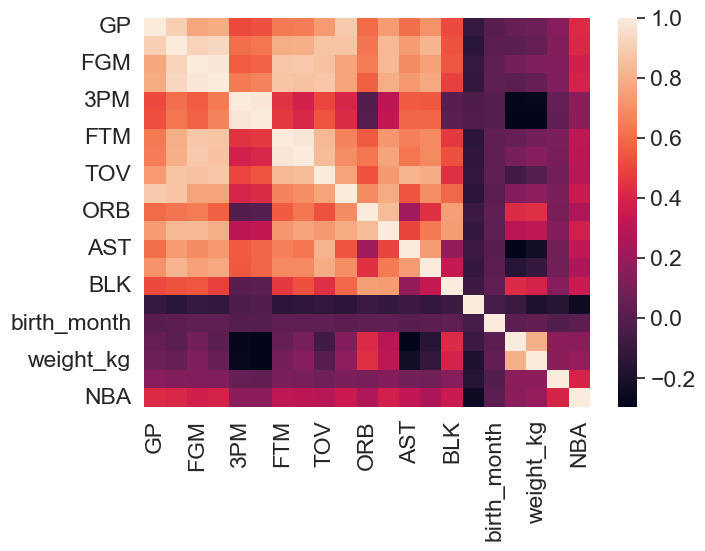

In [38]:
sb.heatmap(df[numeric_cols].corr())
plt.show()

In [39]:
import scipy.stats as stats
import seaborn as sns


T-statistic: 106.72578212082539
P-value: 0.0


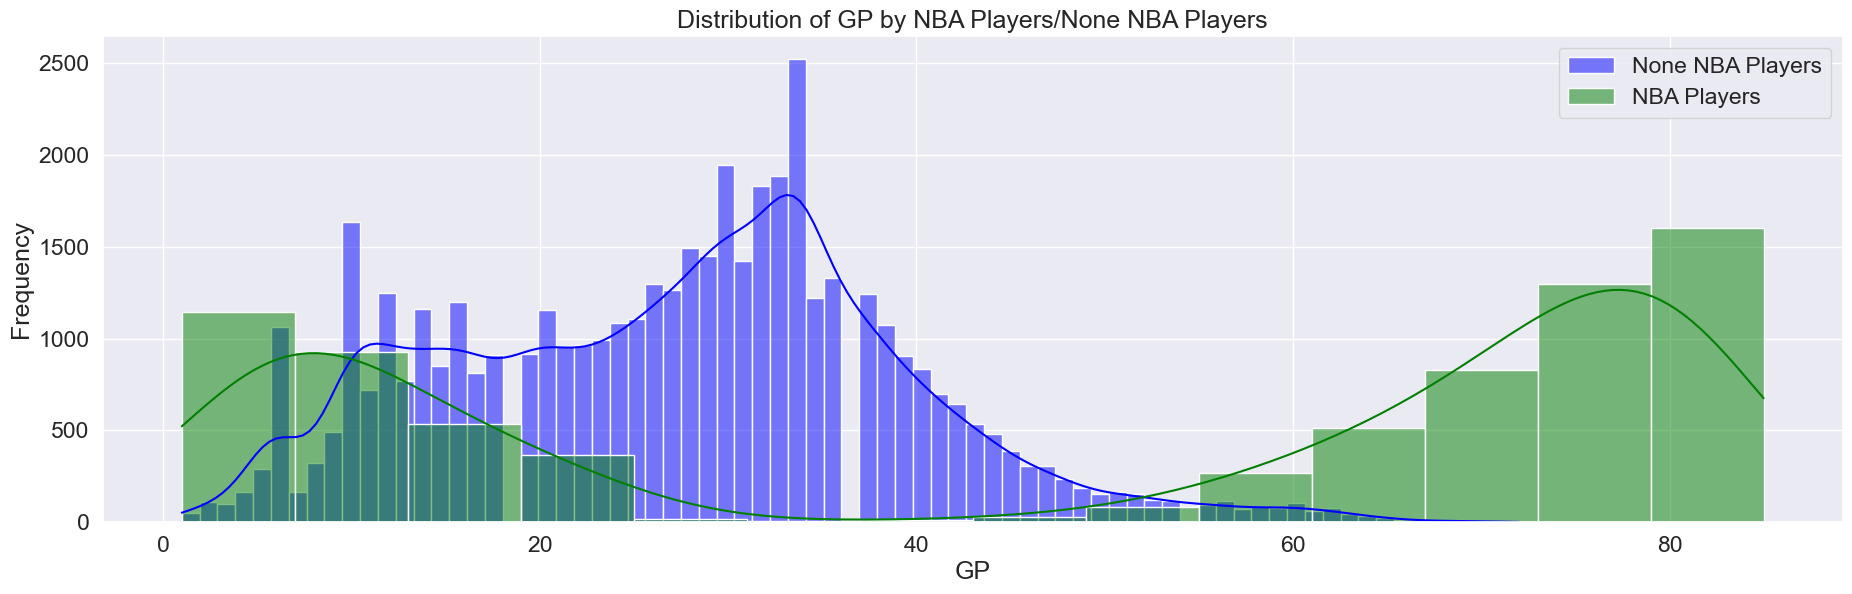

T-statistic: 105.27599113291608
P-value: 0.0


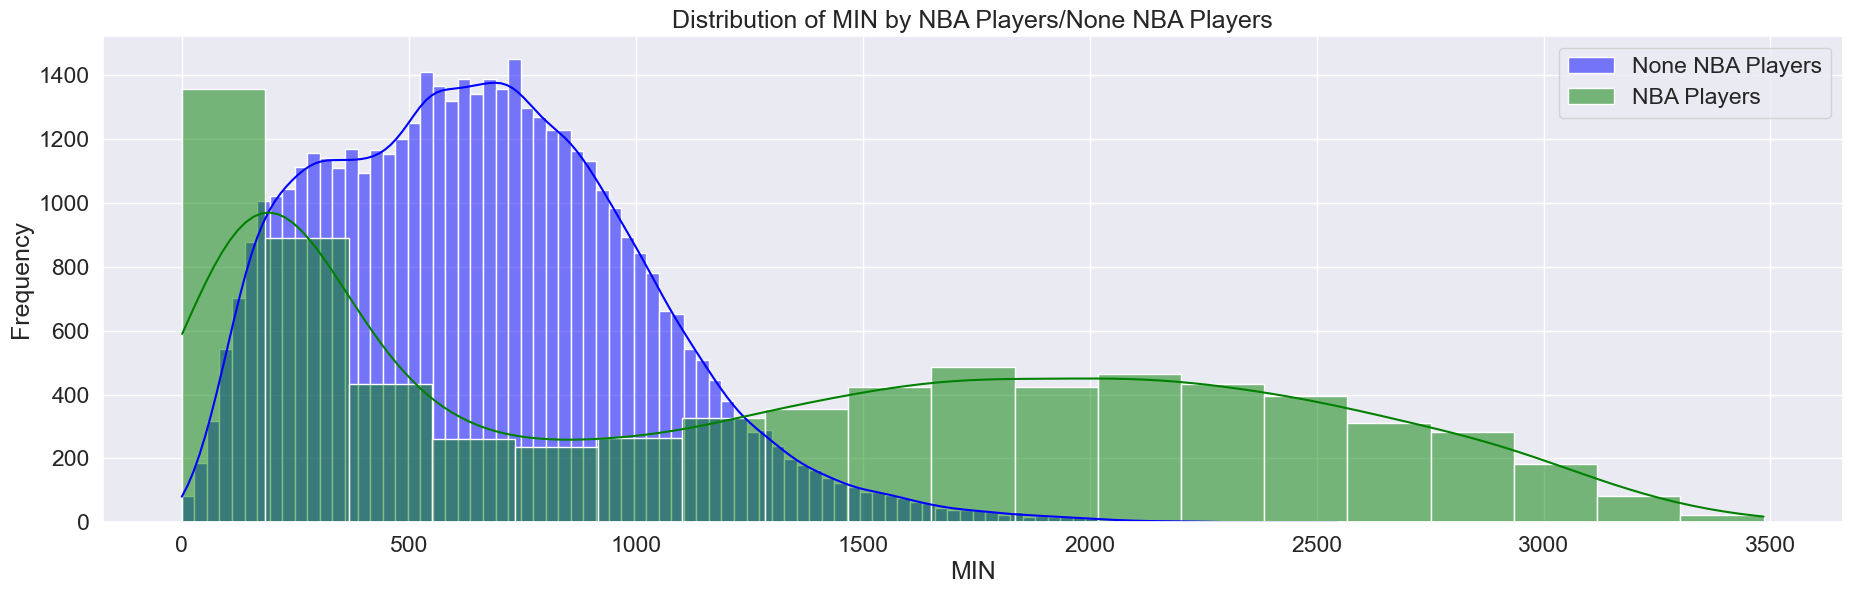

T-statistic: 93.98945736718788
P-value: 0.0


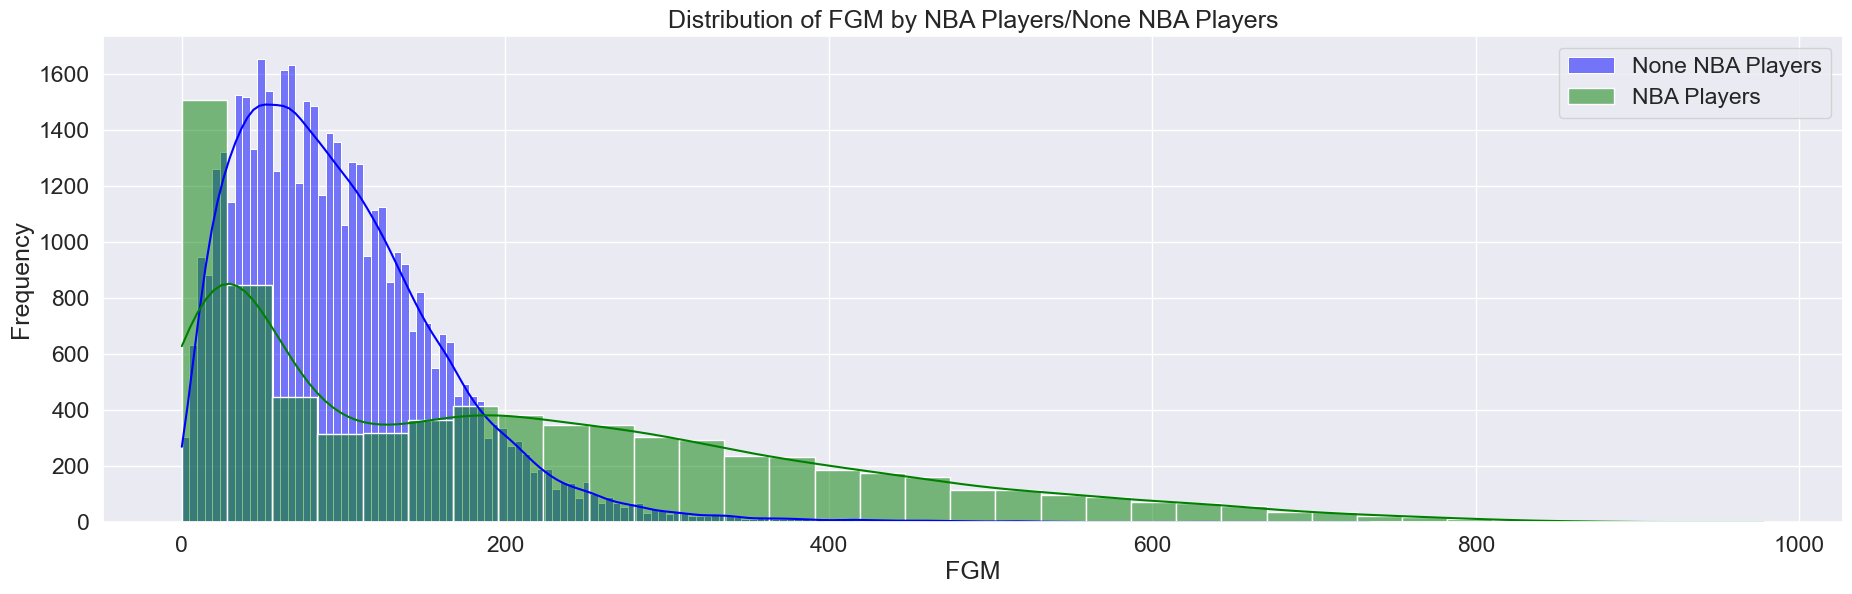

T-statistic: 99.02801110994014
P-value: 0.0


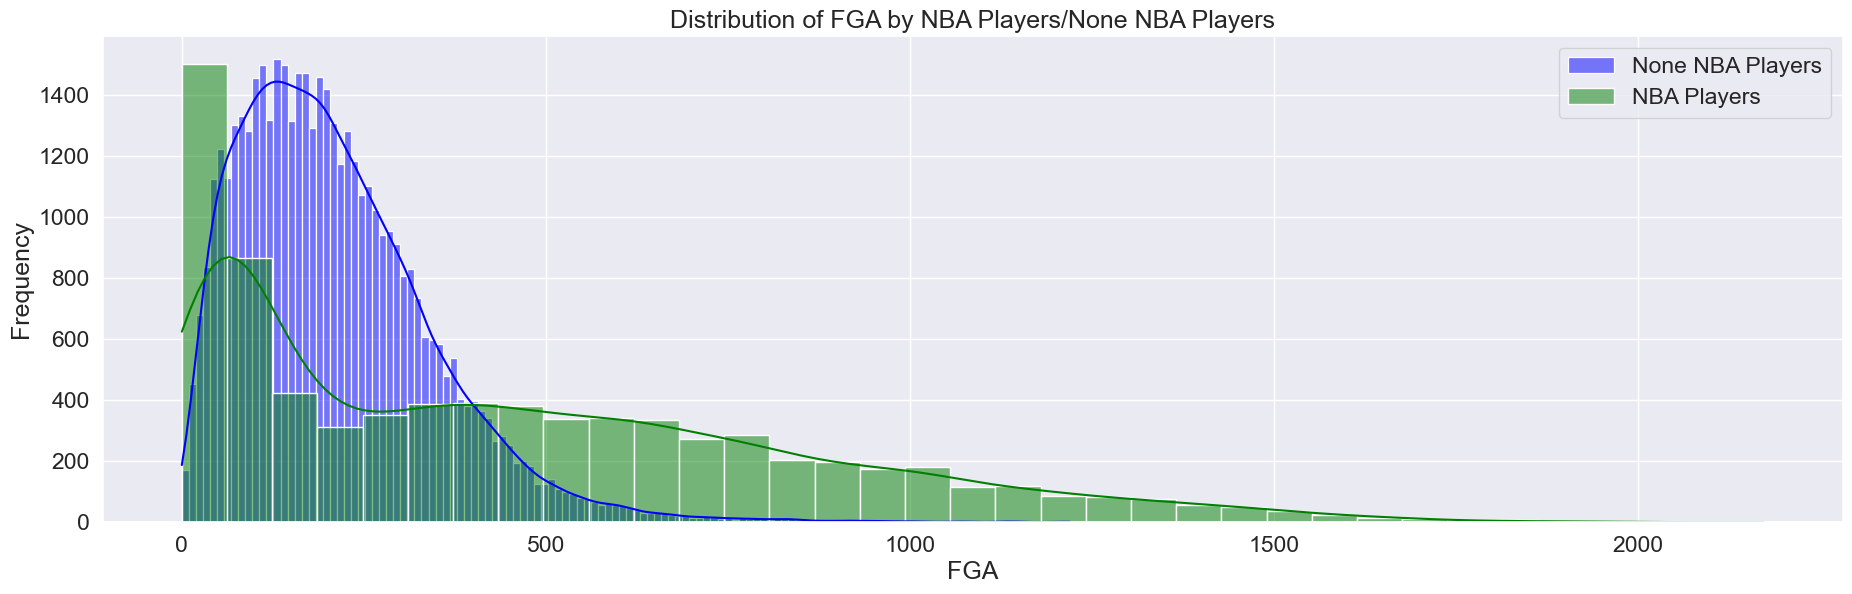

T-statistic: 36.422201095401846
P-value: 5.858846422909663e-287


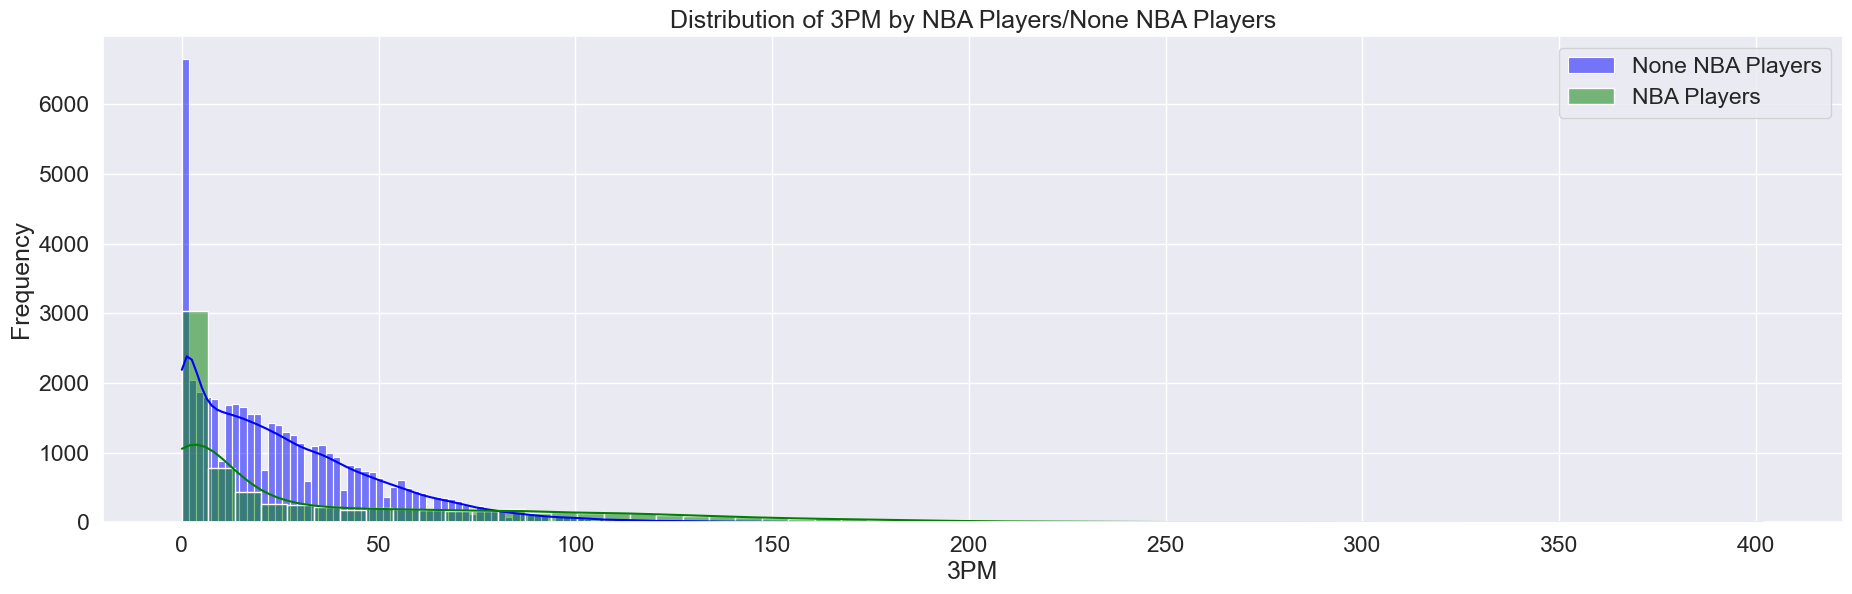

T-statistic: 36.14400269300079
P-value: 1.1229345231222788e-282


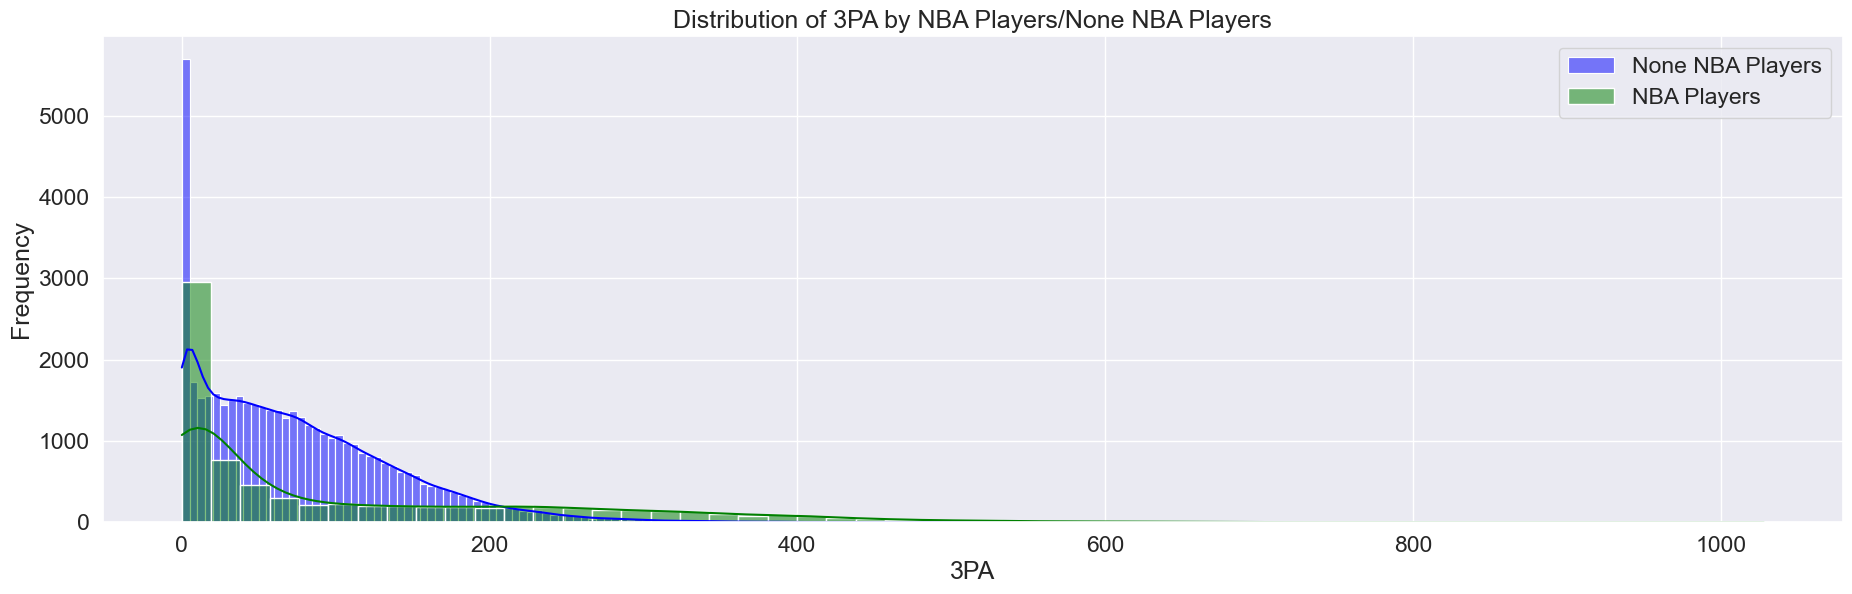

T-statistic: 77.07815141788936
P-value: 0.0


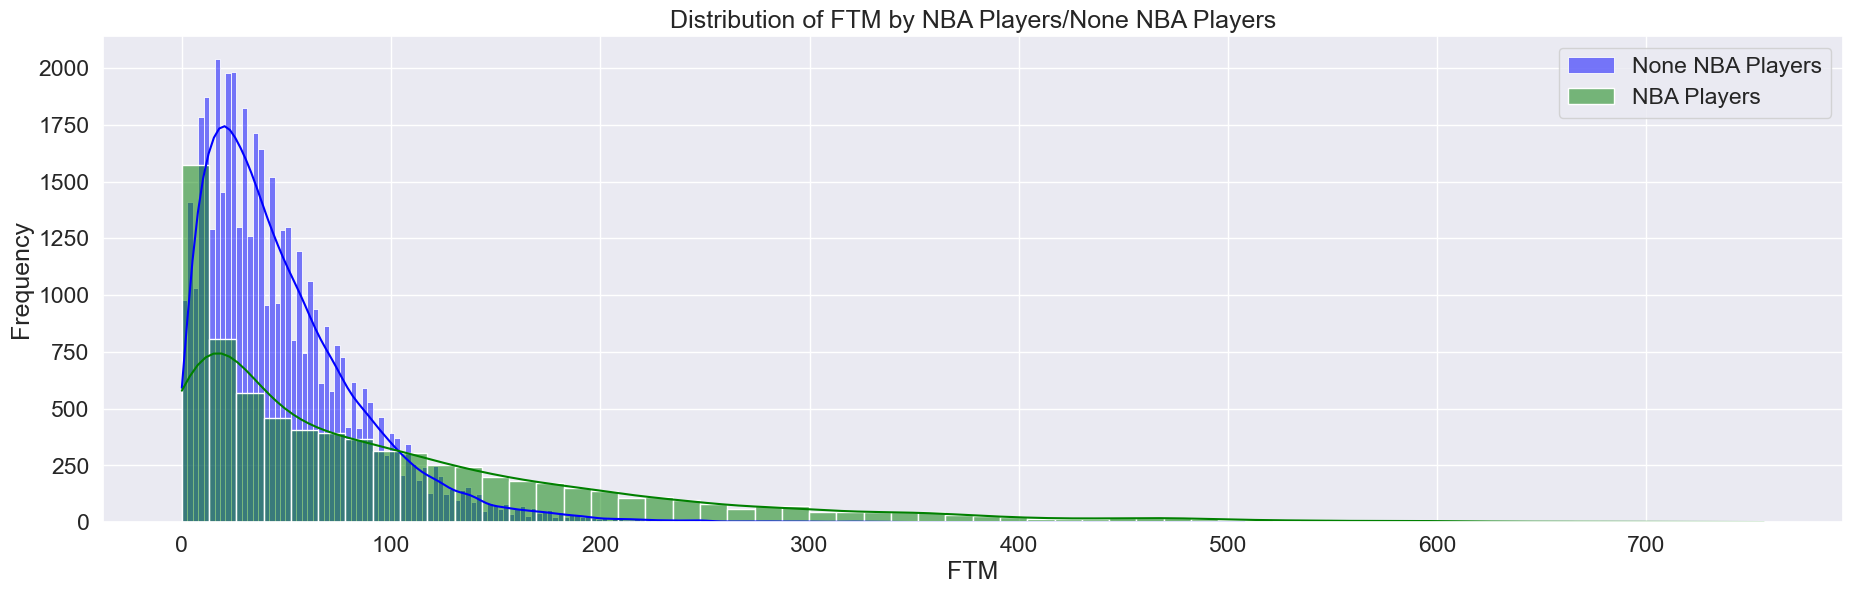

T-statistic: 75.25713176696337
P-value: 0.0


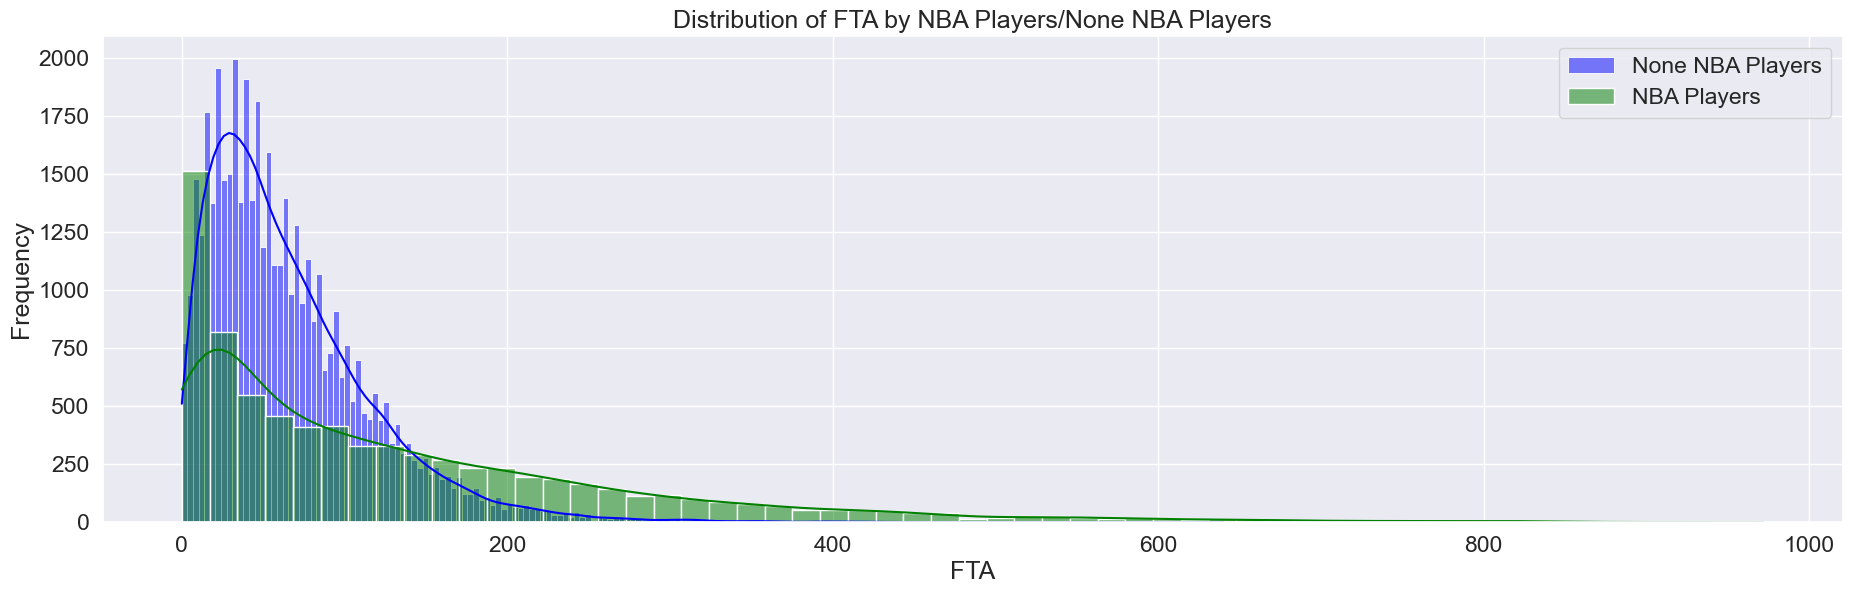

T-statistic: 70.80418777737
P-value: 0.0


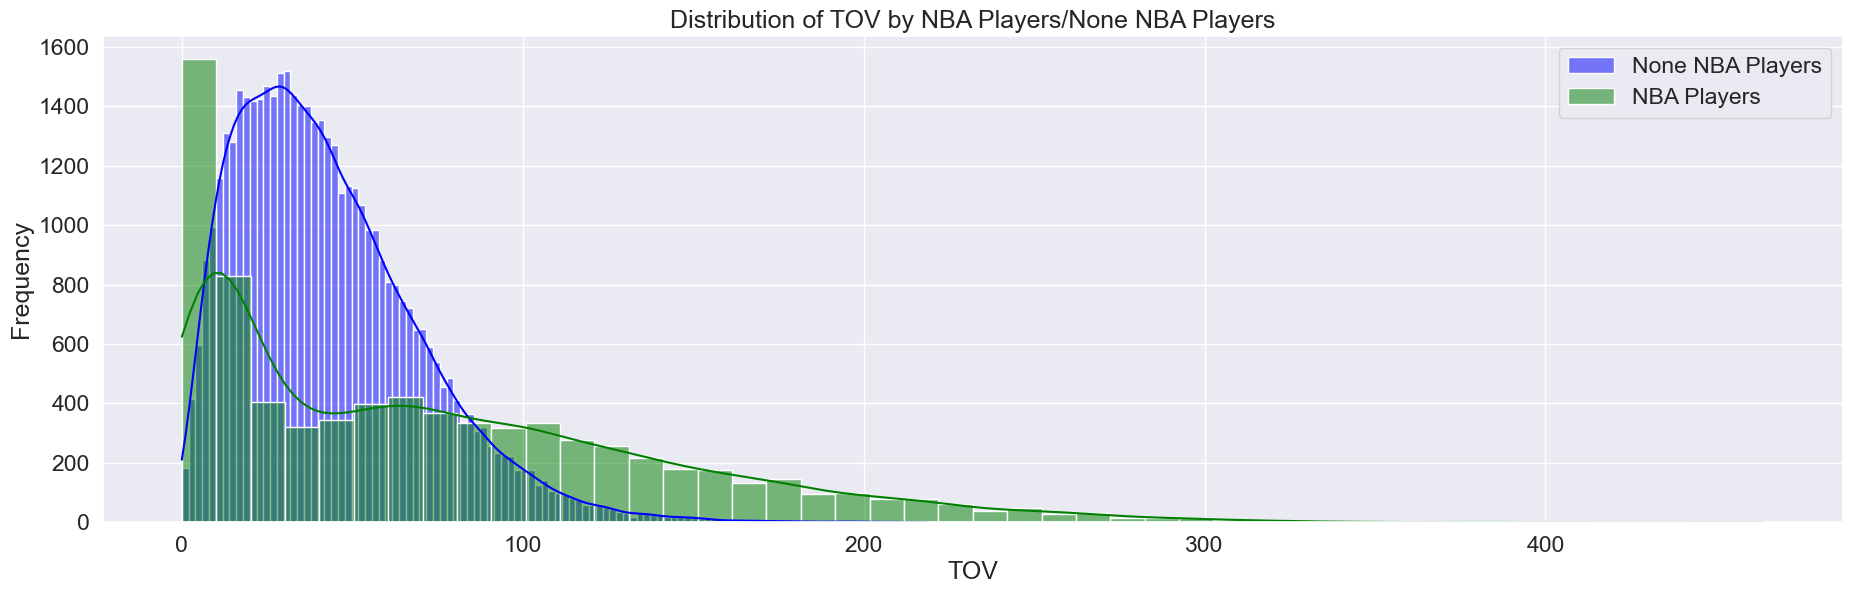

T-statistic: 86.26663681306272
P-value: 0.0


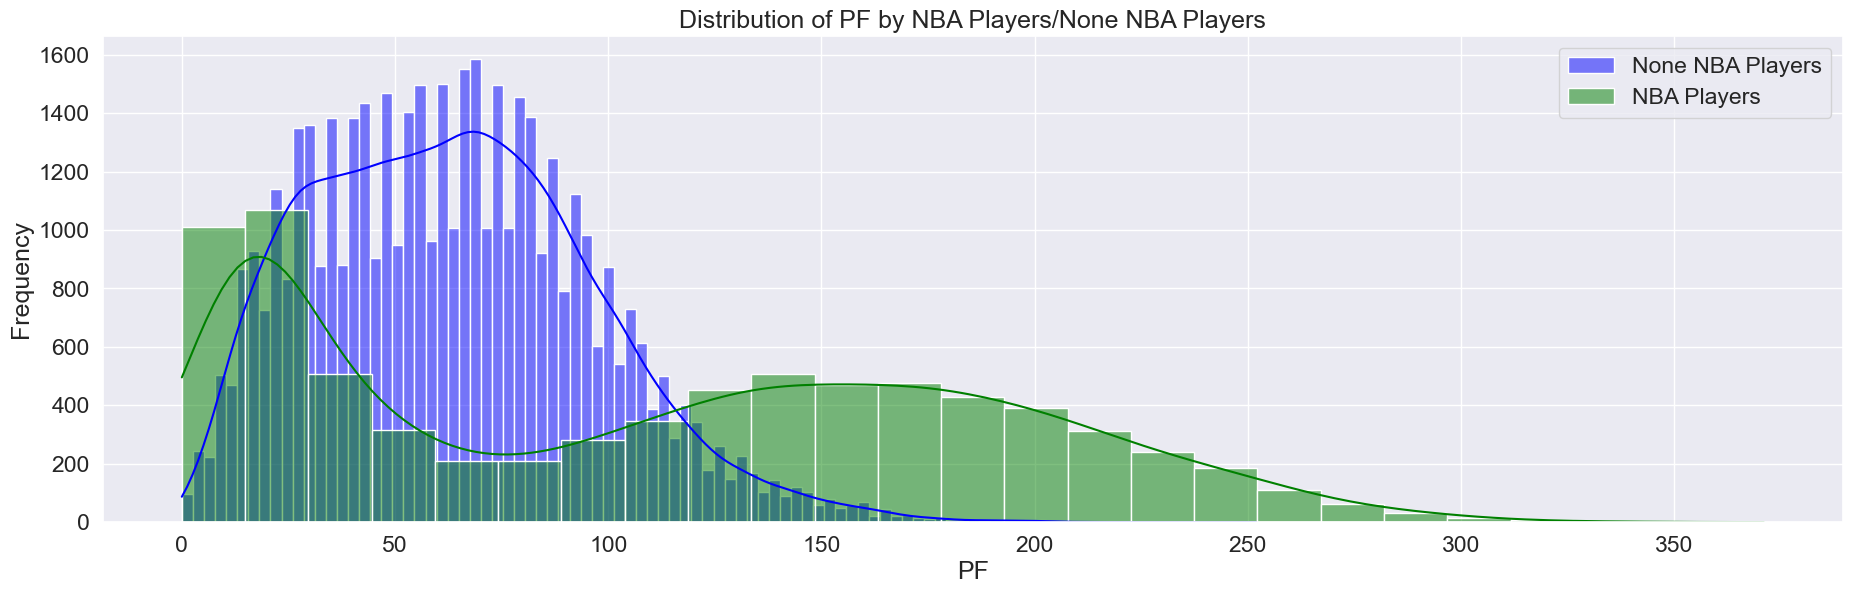

T-statistic: 64.79268847128266
P-value: 0.0


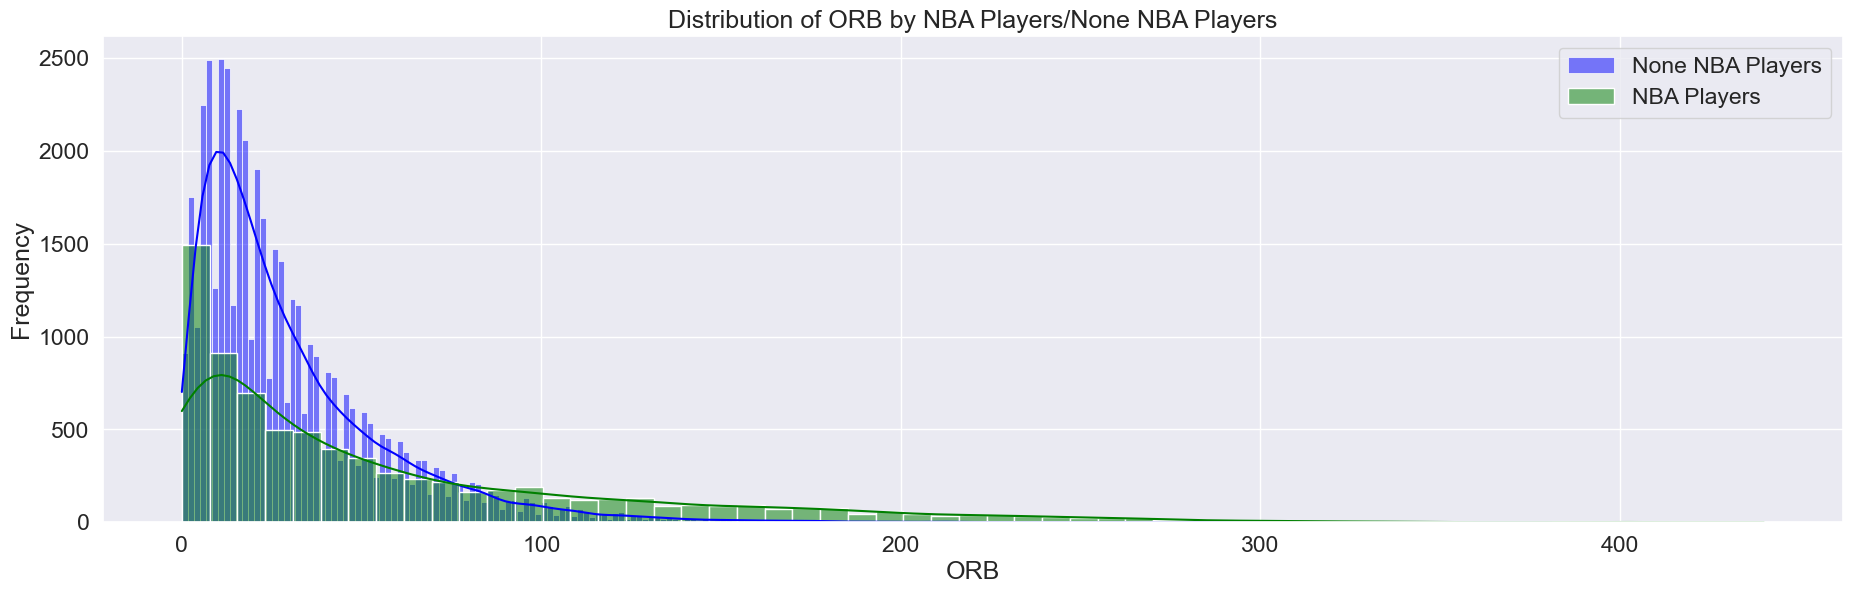

T-statistic: 95.48073305531297
P-value: 0.0


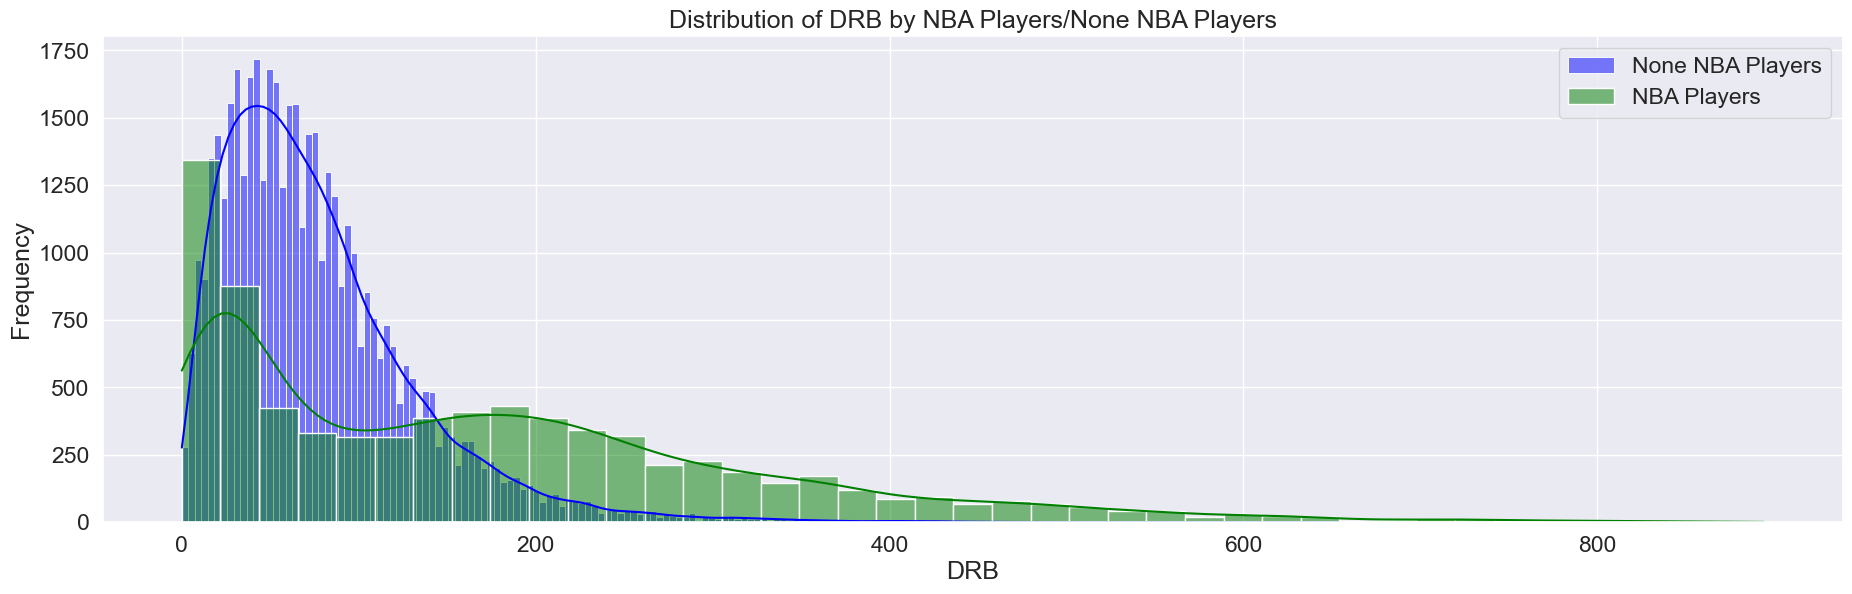

T-statistic: 78.20105550903399
P-value: 0.0


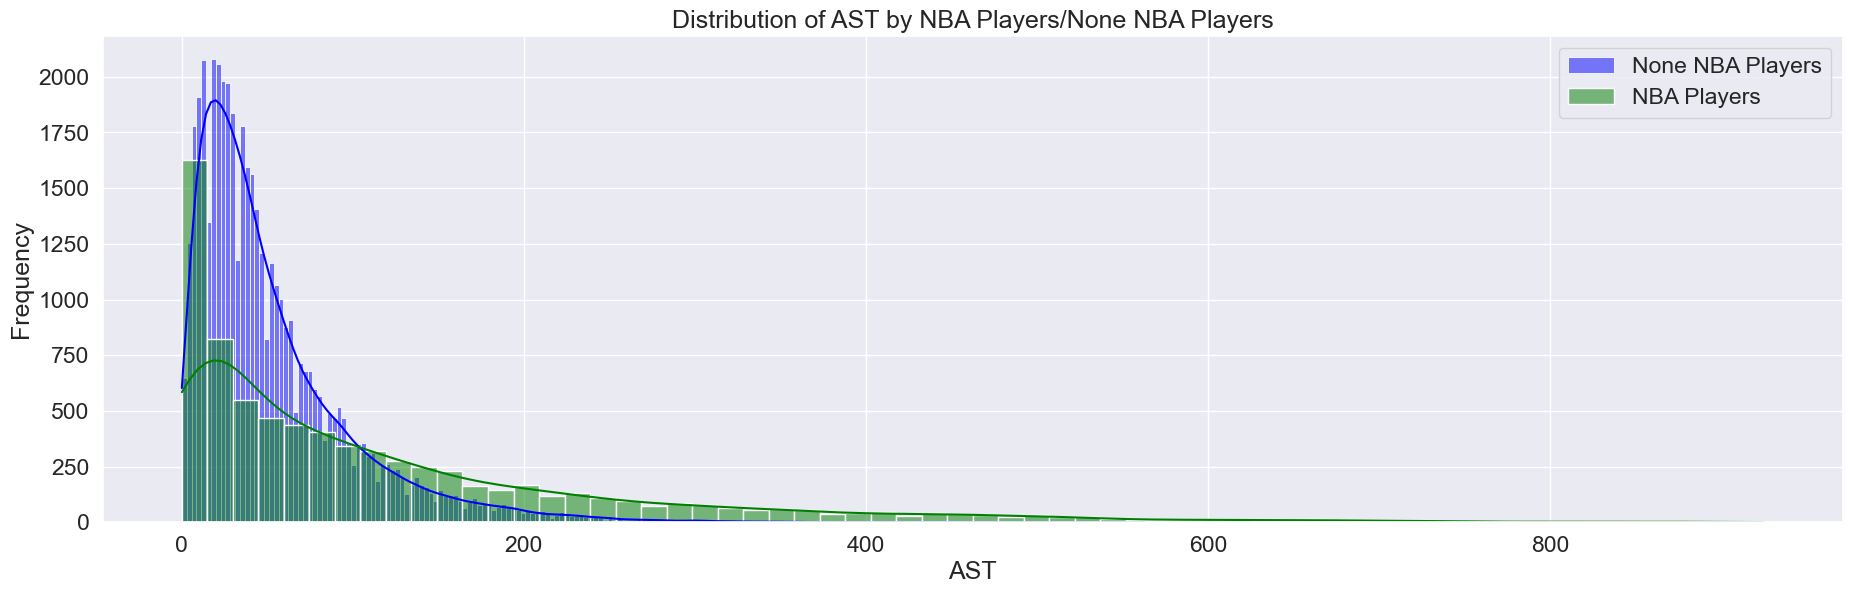

T-statistic: 62.416687723613826
P-value: 0.0


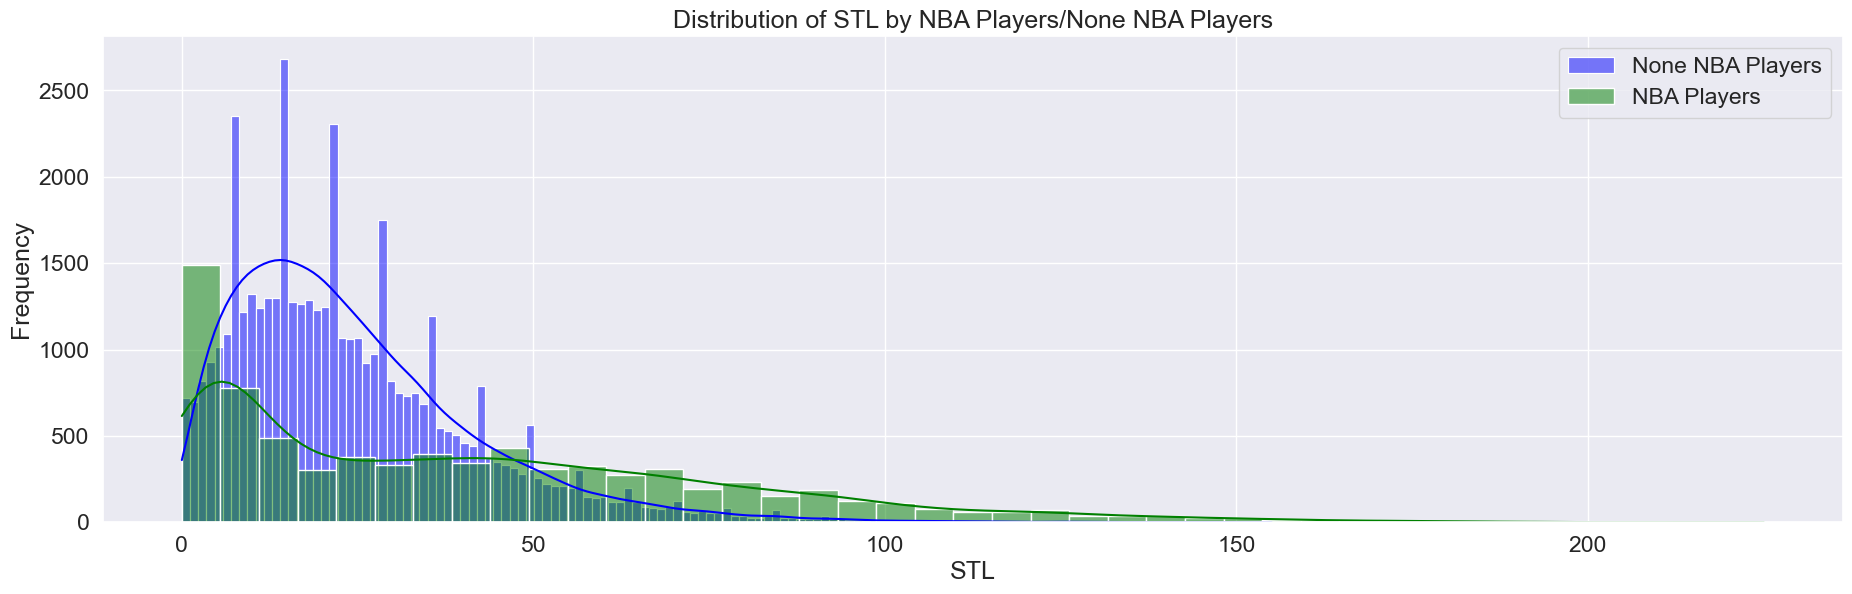

T-statistic: 87.3296741313715
P-value: 0.0


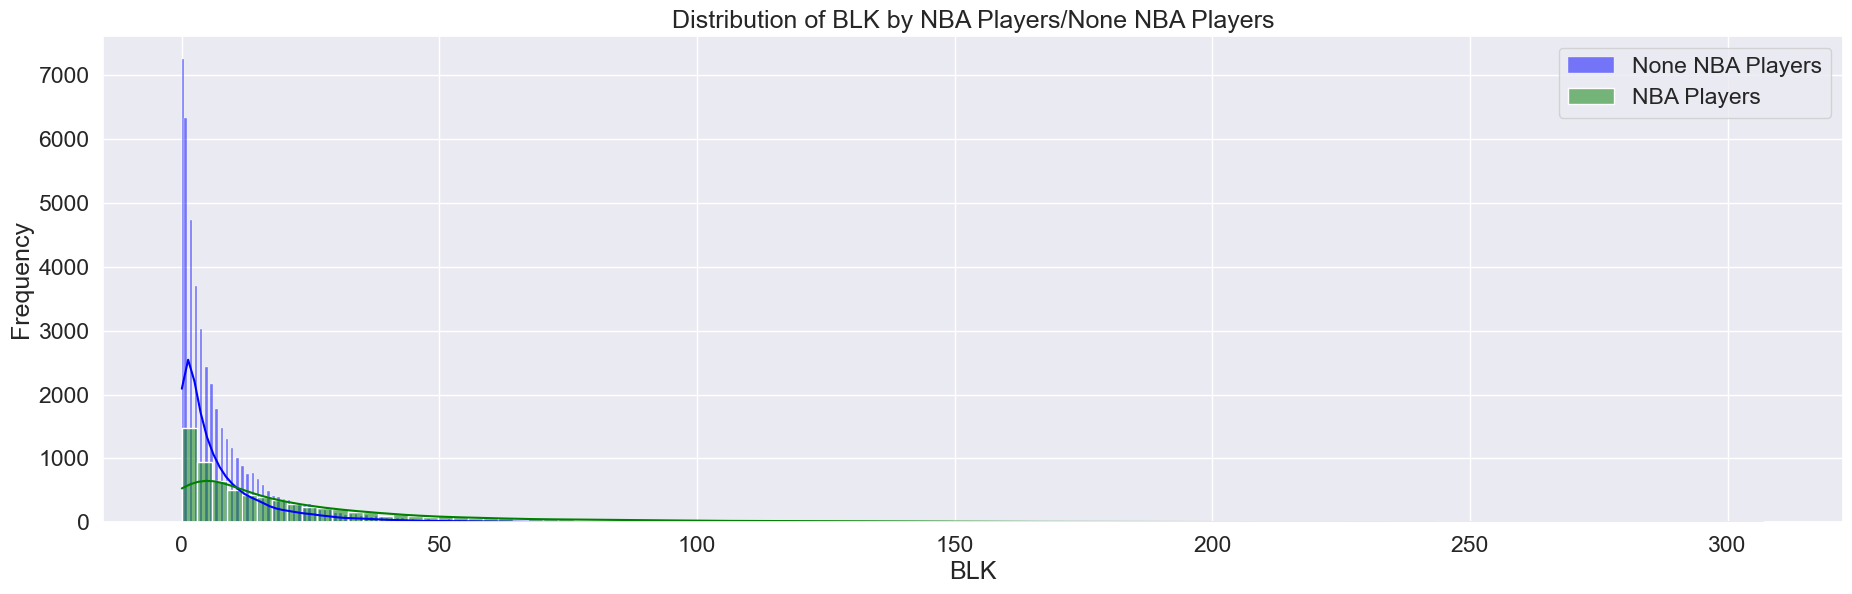

T-statistic: nan
P-value: nan


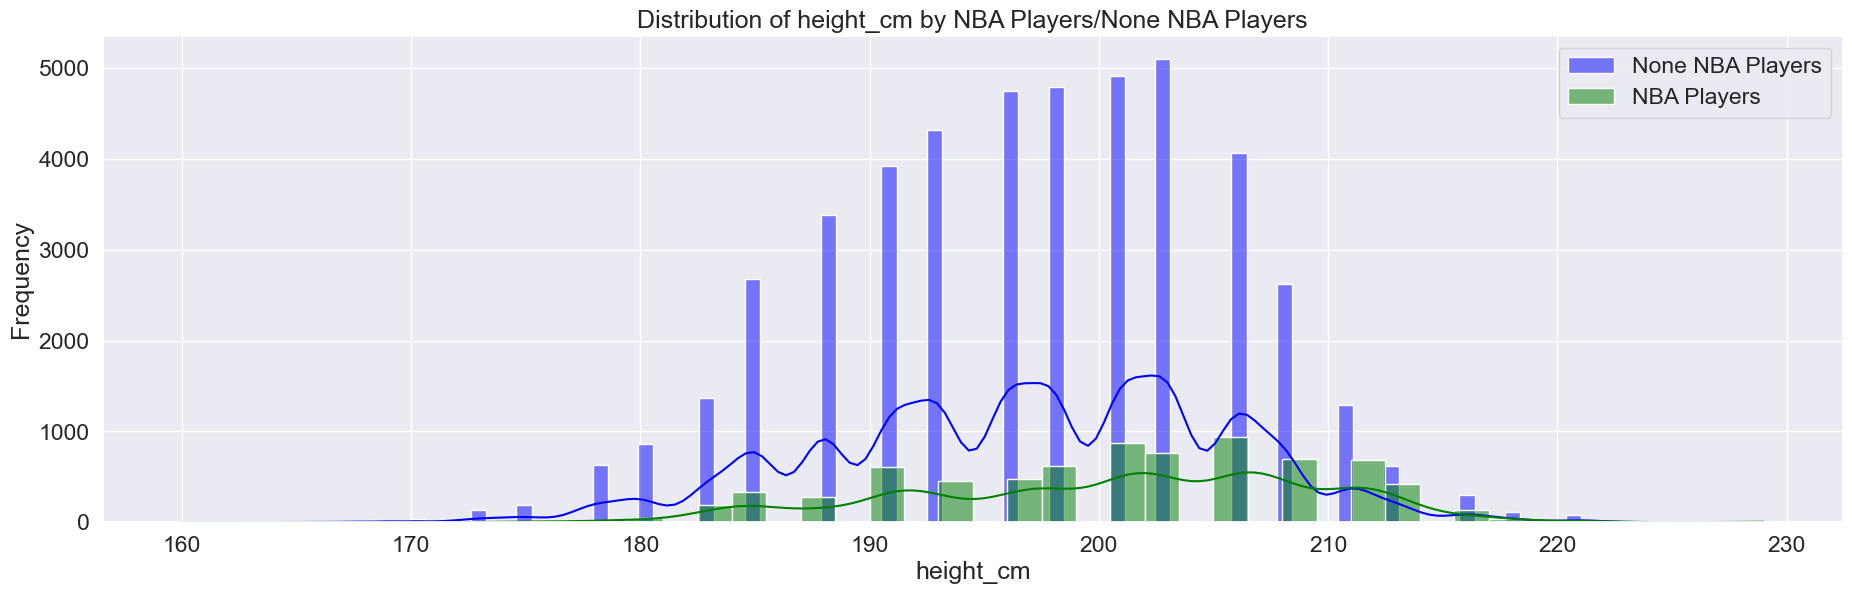

T-statistic: nan
P-value: nan


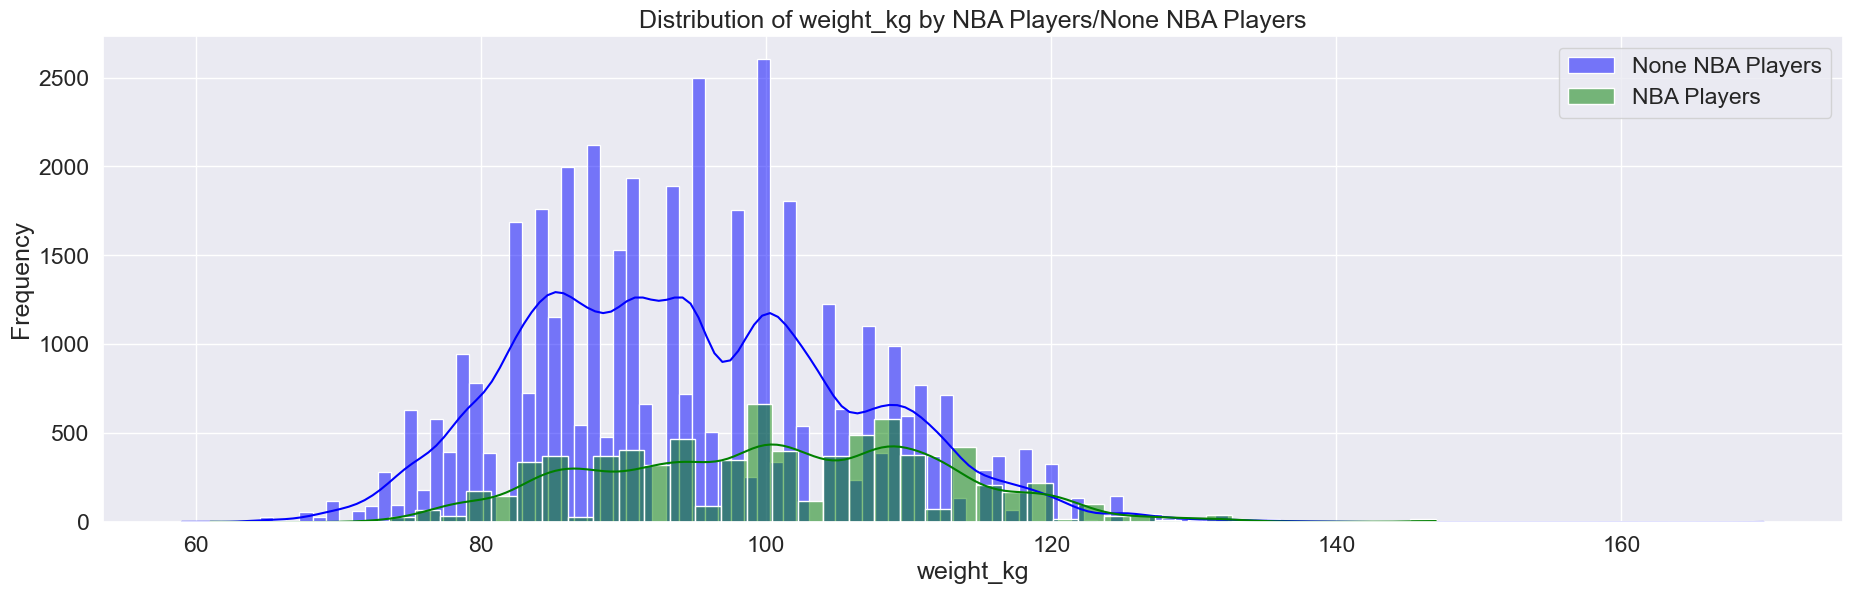

T-statistic: 99.4565234097057
P-value: 0.0


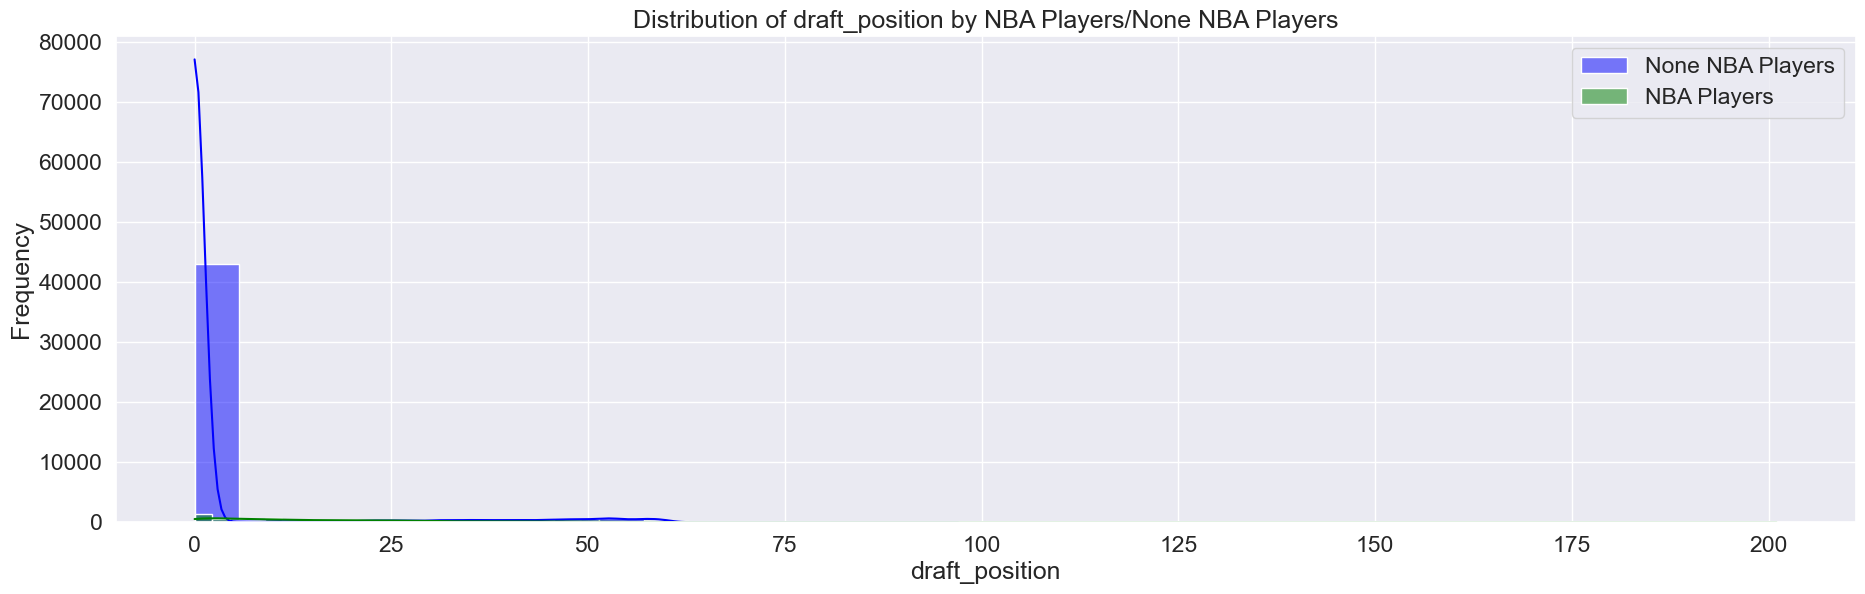

T-statistic: inf
P-value: 0.0


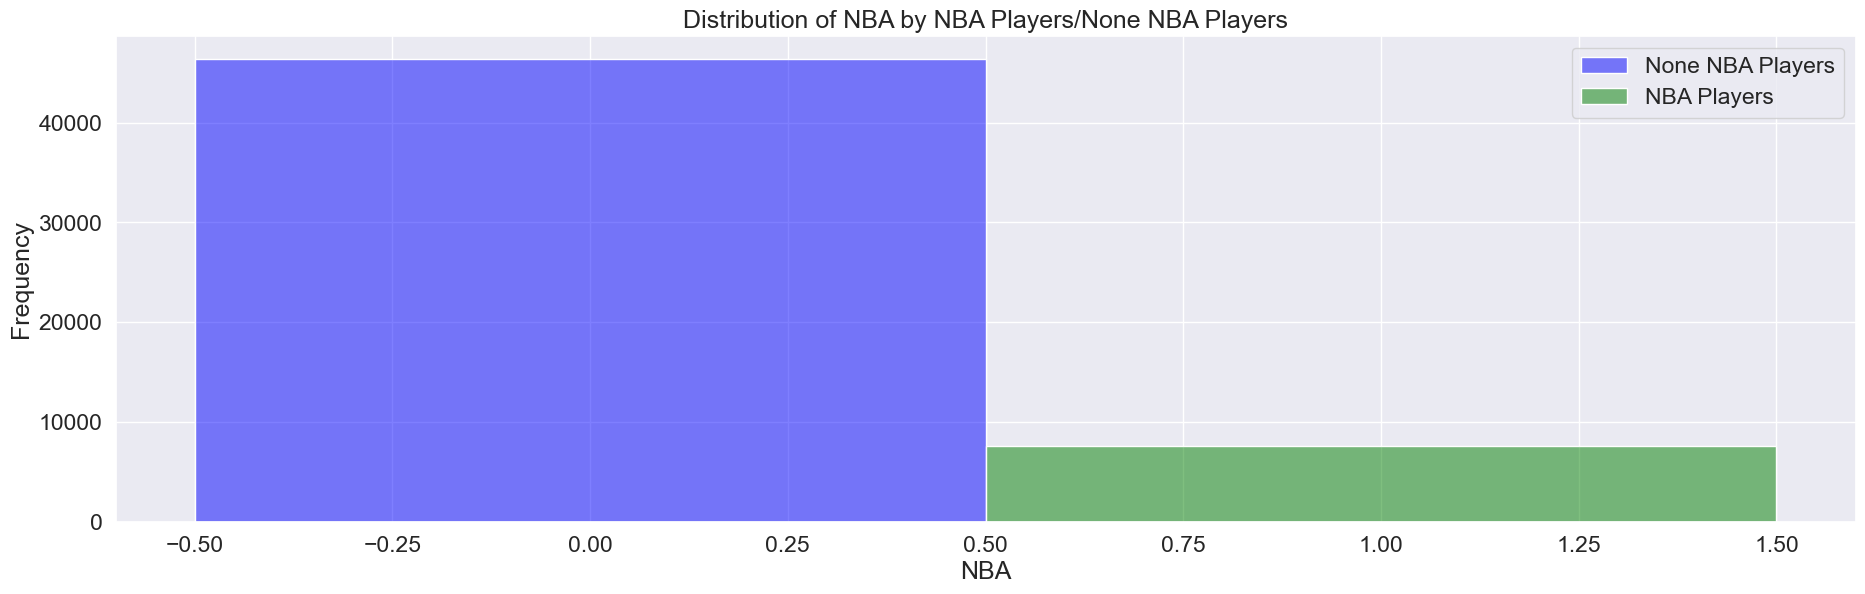

In [40]:

def t_stat(df,column_name):
    other_players = df[df['NBA'] == 0][column_name]
    nba_players = df[df['NBA'] == 1][column_name]
    # Perform an independent samples t-test
    t_stat, p_value = stats.ttest_ind(nba_players, other_players)
    
    # Print the results
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    
    # Plotting the distribution of water consumption for weekends and weekdays
    plt.figure(figsize=(20, 6))
    sns.histplot(other_players, kde=True, color='blue', label='None NBA Players', alpha=0.5)
    sns.histplot(nba_players, kde=True, color='green', label='NBA Players', alpha=0.5)
    plt.title('Distribution of ' + column_name + ' by NBA Players/None NBA Players')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

for column_name in numeric_cols:
    if (column_name!='birth_year' and column_name!='birth_month'):
        t_stat(df,column_name)



In [41]:
save_dataframe(df, 'EDA')
#df=load_dataframe('EDA')

DataFrame saved to EDA


# Data Cleansing

# Outliers

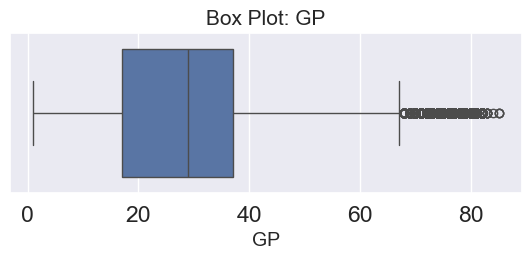

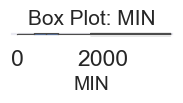

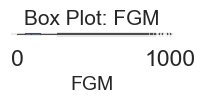

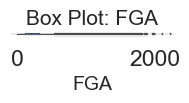

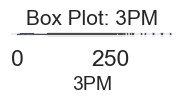

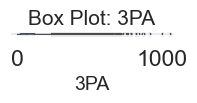

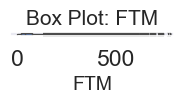

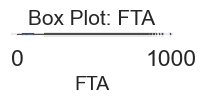

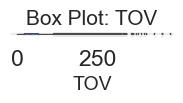

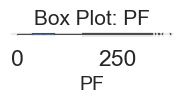

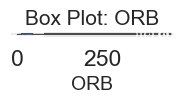

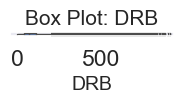

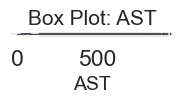

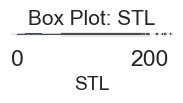

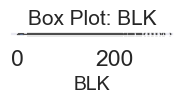

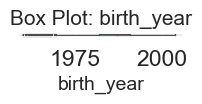

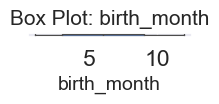

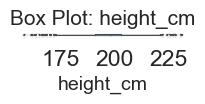

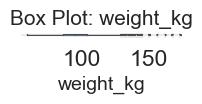

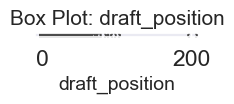

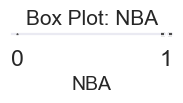

In [44]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sb.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
            plt.show()
        
outliers_boxplot(df[numeric_cols])

In [45]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df[numeric_cols]:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(df[numeric_cols]).sort_values('Percent', ascending=False)
outliers_df.head(100)

Outlier count   Percent 
draft_position     10136.0     18.788115
NBA                 7633.0     14.148548
BLK                 4761.0      8.825001
AST                 3670.0      6.802721
GP                  3651.0      6.767503
ORB                 3476.0      6.443122
DRB                 3202.0      5.935235
FGA                 2956.0      5.479249
FTM                 2886.0      5.349497
FGM                 2857.0      5.295742
MIN                 2829.0      5.243841
FTA                 2761.0      5.117796
STL                 2251.0      4.172459
3PM                 2145.0      3.975977
PF                  2080.0      3.855493
TOV                 2019.0      3.742423
3PA                 1833.0      3.397653
birth_year           437.0      0.810024
weight_kg            154.0      0.285455
height_cm            114.0      0.211311

In [46]:

# Function to identify and treat outliers using IQR
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
        #df_outliers[feature] = np.where(df[feature] > upper_bound,'Outlier',np.where(df[feature]  < lower_bound,'Outlier',df[feature]))

    return df_outliers
    
# Apply the outlier treatment function to numeric columns
outliers_df = treat_outliers(df, numeric_cols)
#print(outliers_df)


In [62]:
from scipy.stats import ks_2samp

#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# Checking distribution and correlation changes
for col in numeric_cols:
    out = df[col]
    non_out = df[col][outliers_df[col] == 0]
    cor_out = df['NBA']
    cor_non_out = df['NBA'][outliers_df[col] == 0]

    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)

    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] -
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

# Add the 'drop' column based on the specified conditions
out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')

print(out_df)


       feature     outliers_cnt distribution_changed correlation_changed drop
0               GP      3651              +                    +           no
1              MIN      2829              +                    +           no
2              FGM      2857              +                    +           no
3              FGA      2956              +                    +           no
4              3PM      2145              +                    +           no
5              3PA      1833              +                    +           no
6              FTM      2886              +                    +           no
7              FTA      2761              +                    +           no
8              TOV      2019              +                    +           no
9               PF      2080              +                    +           no
10             ORB      3476              +                    +           no
11             DRB      3202              +                    +

In [64]:
# Filter features where only distribution changes but not correlation
to_drop = out_df[out_df['drop'] == 'yes']['feature']
print('columns that should not be used in outliners = ',to_drop)

relevant_columns=out_df.loc[out_df['drop']=='no']
#print(relevant_columns.head(20))

relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
#print(relevant_columns_features.head())


columns that should not be used in outliners =  19    draft_position
20               NBA
Name: feature, dtype: object


In [65]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame(index=df.index)  # Initialize an empty DataFrame for outlier flags
    for col in df.select_dtypes(include=['number']):  # Apply to numeric columns only
        if col!='NBA' and col!='draft_position':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)
    return outliers

# Find Outliers
outlier_flags = detect_outliers_iqr(df)
print("\nOutlier Flags (1 = Outlier, 0 = Not Outlier):")
print(outlier_flags.sum())  # Show count of outliers per column



Outlier Flags (1 = Outlier, 0 = Not Outlier):
GP             3651
MIN            2829
FGM            2857
FGA            2956
3PM            2145
3PA            1833
FTM            2886
FTA            2761
TOV            2019
PF             2080
ORB            3476
DRB            3202
AST            3670
STL            2251
BLK            4761
birth_year      437
birth_month       0
height_cm       114
weight_kg       154
dtype: int64


In [66]:
for col in df.select_dtypes(include=['number']):
    if col!='NBA' and col!='draft_position':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

print("\nDataFrame with Outliers Replaced by NaN:")
print(df.isna().sum())  # Show how many NaN values exist per column



DataFrame with Outliers Replaced by NaN:
League                0
Season                0
Stage                 0
Player                0
Team                 11
GP                 3651
MIN                2829
FGM                2857
FGA                2956
3PM                2145
3PA                1833
FTM                2886
FTA                2761
TOV                2019
PF                 2080
ORB                3476
DRB                3202
AST                3670
STL                2251
BLK                4761
birth_year          437
birth_month           0
height_cm           188
weight_kg          4718
nationality           0
high_school       30266
draft_team        43813
Position              0
draft_position        0
NBA                   0
dtype: int64


In [67]:
# Fill missing values in the 'Team' column with 'team_name' + index
df['Team'] = df['Team'].fillna(df.index.to_series().apply(lambda i: f'team_name{i}'))
df['draft_team'] = df['draft_team'].fillna('N/A')
df['high_school'] = df['high_school'].fillna('N/A')
df['nationality'] = df['nationality'].fillna('N/A')

In [68]:
missing_stats(df)

                Missing Count  Total Rows  Missing Percentage
League                 0          53949         0.000000     
Season                 0          53949         0.000000     
Stage                  0          53949         0.000000     
Player                 0          53949         0.000000     
Team                   0          53949         0.000000     
GP                  3651          53949         6.767503     
MIN                 2829          53949         5.243841     
FGM                 2857          53949         5.295742     
FGA                 2956          53949         5.479249     
3PM                 2145          53949         3.975977     
3PA                 1833          53949         3.397653     
FTM                 2886          53949         5.349497     
FTA                 2761          53949         5.117796     
TOV                 2019          53949         3.742423     
PF                  2080          53949         3.855493     
ORB     

In [69]:
from sklearn.impute import KNNImputer
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Get numeric columns that have NaN values
imp_cols = numeric_cols.columns[numeric_cols.isna().sum() > 0]

# Print result
print("Numeric columns with NaN values:", imp_cols.tolist())
#imp_cols = ['height_cm','weight_kg']
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(df[imp_cols]), columns=imp_cols)
df[imp_cols] = imputed_data

df['BMI'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
#df = df.drop(['weight_kg', 'height_cm'], axis=1)


Numeric columns with NaN values: ['GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'birth_year', 'height_cm', 'weight_kg']


In [70]:
missing_stats(df)

                Missing Count  Total Rows  Missing Percentage
League                0           53949            0.0       
Season                0           53949            0.0       
Stage                 0           53949            0.0       
Player                0           53949            0.0       
Team                  0           53949            0.0       
GP                    0           53949            0.0       
MIN                   0           53949            0.0       
FGM                   0           53949            0.0       
FGA                   0           53949            0.0       
3PM                   0           53949            0.0       
3PA                   0           53949            0.0       
FTM                   0           53949            0.0       
FTA                   0           53949            0.0       
TOV                   0           53949            0.0       
PF                    0           53949            0.0       
ORB     

In [71]:
save_dataframe(df,'Feature Engineering')
#df=load_dataframe('Feature Engineering')
#df.info()

DataFrame saved to Feature Engineering


# Feature Engineering & Feature Selection

In [73]:

from IPython.core.display import display, HTML

# Display scrollable output for Manu Ginobili after grouping
#display(HTML(df[df['Player'] == 'manu ginobili'].to_html(
#    notebook=True, escape=False, max_rows=500, max_cols=50, border=1
#)))

# Filter only Regular_Season and Playoffs
df_filtered = df[df['Stage'].isin(['regularseason', 'playoffs'])]


# Define the groupby columns (these should remain unchanged)
groupby_cols = [
    'League', 'Season','Player', 'Team', 'birth_year', 'birth_month',
     'nationality', 'high_school',
    'draft_position', 'draft_team','Position','BMI','NBA'
]
'''
groupby_cols = [
    'League', 'Season','Player', 'Team', 'birth_year', 'birth_month',
    'height_cm', 'weight_kg', 'nationality', 'high_school',
    'draft_position', 'draft_team','Position','BMI','NBA'
]
'''
# Perform groupby and sum the numeric columns
df_merged = df_filtered.groupby(groupby_cols, as_index=False).sum(numeric_only=True)

# Set the stage as "NBA Season" for merged data
df_merged['Stage'] = 'NBA Season'

# Remove original Regular_Season & Playoffs rows from df
df = df[~df['Stage'].isin(['regularseason', 'playoffs'])]

# Append the updated (merged) data to df
df = pd.concat([df, df_merged], ignore_index=True)

'''
# Display scrollable output for Manu Ginobili after grouping
display(HTML(df[df['Player'] == 'manu ginobili'].to_html(
    notebook=True, escape=False, max_rows=500, max_cols=50, border=1
)))
'''

"\n# Display scrollable output for Manu Ginobili after grouping\ndisplay(HTML(df[df['Player'] == 'manu ginobili'].to_html(\n    notebook=True, escape=False, max_rows=500, max_cols=50, border=1\n)))\n"

In [74]:
print(missing_stats(df))

                Missing Count  Total Rows  Missing Percentage
League                0           51566            0.0       
Season                0           51566            0.0       
Stage                 0           51566            0.0       
Player                0           51566            0.0       
Team                  0           51566            0.0       
GP                    0           51566            0.0       
MIN                   0           51566            0.0       
FGM                   0           51566            0.0       
FGA                   0           51566            0.0       
3PM                   0           51566            0.0       
3PA                   0           51566            0.0       
FTM                   0           51566            0.0       
FTA                   0           51566            0.0       
TOV                   0           51566            0.0       
PF                    0           51566            0.0       
ORB     

# One-Hot Encoding

In [76]:
#print(df['NBA'].value_counts())

df['League'] = df['League'].astype('category')
df['League']=convert_LabelEncoder(df,'League')
#print(df['League'].value_counts())


df['Season'] = df['Season'].astype('category')
df['Season']=convert_LabelEncoder(df,'Season')
#print(df['Season'].value_counts())

df['Stage'] = df['Stage'].astype('category')
df['Stage']=convert_LabelEncoder(df,'Stage')
#print(df['Stage'].value_counts())

df['nationality'] = df['nationality'].astype('category')
df['nationality']=convert_LabelEncoder(df,'nationality')
#print(df['nationality'].value_counts())


df['Position'] = df['Position'].astype('category')
df['Position']=convert_LabelEncoder(df,'Position')
#print(df['Position'].value_counts())


df['Team'] = df['Team'].astype('category')
df['Team']=convert_LabelEncoder(df,'Team')
#print(df['Team'].value_counts())

    


In [77]:
missing_stats(df)

                Missing Count  Total Rows  Missing Percentage
League                0           51566            0.0       
Season                0           51566            0.0       
Stage                 0           51566            0.0       
Player                0           51566            0.0       
Team                  0           51566            0.0       
GP                    0           51566            0.0       
MIN                   0           51566            0.0       
FGM                   0           51566            0.0       
FGA                   0           51566            0.0       
3PM                   0           51566            0.0       
3PA                   0           51566            0.0       
FTM                   0           51566            0.0       
FTA                   0           51566            0.0       
TOV                   0           51566            0.0       
PF                    0           51566            0.0       
ORB     

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51566 entries, 0 to 51565
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   League          51566 non-null  int32  
 1   Season          51566 non-null  int32  
 2   Stage           51566 non-null  int32  
 3   Player          51566 non-null  string 
 4   Team            51566 non-null  int32  
 5   GP              51566 non-null  float64
 6   MIN             51566 non-null  float64
 7   FGM             51566 non-null  float64
 8   FGA             51566 non-null  float64
 9   3PM             51566 non-null  float64
 10  3PA             51566 non-null  float64
 11  FTM             51566 non-null  float64
 12  FTA             51566 non-null  float64
 13  TOV             51566 non-null  float64
 14  PF              51566 non-null  float64
 15  ORB             51566 non-null  float64
 16  DRB             51566 non-null  float64
 17  AST             51566 non-null 

In [79]:
from sklearn.model_selection import train_test_split

save_dataframe(df, 'dataframe_ready')
#df=load_dataframe('dataframe_ready')
X = df.drop(columns=['NBA','Player','high_school','draft_team'])
y = df['NBA']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




DataFrame saved to dataframe_ready


In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[9204   60]
 [ 295  755]]


In [82]:
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
accuracy

0.9655807640100834

In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9264
           1       0.93      0.72      0.81      1050

    accuracy                           0.97     10314
   macro avg       0.95      0.86      0.90     10314
weighted avg       0.96      0.97      0.96     10314



In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9264
           1       1.00      1.00      1.00      1050

    accuracy                           1.00     10314
   macro avg       1.00      1.00      1.00     10314
weighted avg       1.00      1.00      1.00     10314

[[9264    0]
 [   0 1050]]


In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)



In [86]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9264
           1       1.00      1.00      1.00      1050

    accuracy                           1.00     10314
   macro avg       1.00      1.00      1.00     10314
weighted avg       1.00      1.00      1.00     10314



In [87]:
print(confusion_matrix(y_test, pred))

[[9264    0]
 [   0 1050]]


In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("\nSupport Vector Classifier (SVC) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))



Support Vector Classifier (SVC) Performance:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9264
           1       0.90      0.65      0.75      1050

    accuracy                           0.96     10314
   macro avg       0.93      0.82      0.86     10314
weighted avg       0.95      0.96      0.95     10314

Confusion Matrix:
[[9187   77]
 [ 369  681]]


In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Initialize and train AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Initialize and train Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

#evaluate_model("Logistic Regression", y_test, y_pred_log)
#evaluate_model("Random Forest", y_test, y_pred_rf)
#evaluate_model("Support Vector Classifier (SVC)", y_test, y_pred_svc)
#evaluate_model("Decision Tree", y_test, y_pred_dt)
#evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("AdaBoost", y_test, y_pred_ada)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)



Naive Bayes Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9264
           1       1.00      1.00      1.00      1050

    accuracy                           1.00     10314
   macro avg       1.00      1.00      1.00     10314
weighted avg       1.00      1.00      1.00     10314

Confusion Matrix:
[[9264    0]
 [   0 1050]]

AdaBoost Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9264
           1       1.00      1.00      1.00      1050

    accuracy                           1.00     10314
   macro avg       1.00      1.00      1.00     10314
weighted avg       1.00      1.00      1.00     10314

Confusion Matrix:
[[9264    0]
 [   0 1050]]

Gradient Boosting Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      